#SkinDx AI: A Lightweight Model for Skin Lesion Risk Assessment Using Open-Source images
#Problem Statement
We are build a fast, mobile-friendly ML model that classifies skin lesion images (e.g., mole, acne, rash, melanoma suspicion) into "low risk" and "high risk" categories for early detection.

Goal: Aid telemedicine platforms or rural clinics with AI-assisted first screening before dermatologist access.

# Data Sources
[ISIC Challege 2020](https://challenge.isic-archive.com/data/#2020)

FastAPI + HuggingFace for lightweight inference backend

#Data Mounting
The following code mounts Google Drive to access files stored there and sets up paths to folders containing skin lesion images (benign and malignant) and a CSV file with image labels. It uses pandas to load the CSV data and display its contents. A helper function load_image is defined using OpenCV to load an image from a given path, convert it to RGB, resize it to 224×224 pixels, and normalize pixel values to a range of [0, 1] for input into machine learning models.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
# Set base path
# Update this path to match your actual shared folder location
base_path = '/content/drive/My Drive/DataScienceProjects/train_subset/'
# Image folders
benign_path = os.path.join(base_path, 'benign')
malignant_path = os.path.join(base_path, 'malignant')
# CSV path
csv_path = os.path.join(base_path, 'SkinDx_subset_labels.csv')
import pandas as pd
# Load CSV
df = pd.read_csv(csv_path)
print(df.head())
import cv2
import numpy as np
# Function to load and resize image
def load_image(img_path, size=(224, 224)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    img = img / 255.0  # Normalize to [0,1]
    return img

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         image_name  patient_id   lesion_id     sex  age_approx  \
0  ISIC_9085719.jpg  IP_3562983  IL_5530050    male        35.0   
1  ISIC_3990124.jpg  IP_9909432  IL_9698216    male        35.0   
2  ISIC_5125438.jpg  IP_1139701  IL_3768935  female        45.0   
3  ISIC_3076237.jpg  IP_9802994  IL_9979757  female        40.0   
4  ISIC_5209007.jpg  IP_1051664  IL_8930710    male        35.0   

  anatom_site_general_challenge diagnosis benign_malignant  target  
0                         torso   unknown           benign       0  
1                         torso   unknown           benign       0  
2                         torso   unknown           benign       0  
3                         torso   unknown           benign       0  
4               lower extremity     nevus           benign       0  


#Binary Classification
This code prepares the image dataset for training. It loops through each row in the CSV file, assigns a label (0 for benign, 1 for malignant), and constructs the full path to the corresponding image file. If the image exists, it is loaded, resized, and normalized using the load_image function, then added to a list along with its label. Finally, the lists of images and labels are converted into NumPy arrays (X and y) for use in machine learning models. A summary is printed showing how many images were loaded and the shapes of the resulting arrays.

In [ ]:
# Prepare data
images = []
labels = []
for idx, row in df.iterrows():
    label = 0 if row['benign_malignant'] == 'benign' else 1
    img_folder = 'benign' if label == 0 else 'malignant'
    img_path = os.path.join(base_path, img_folder, row['image_name'])
    if os.path.exists(img_path):
        img = load_image(img_path)
        if img is not None:
            images.append(img)
            labels.append(label)

# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

print(f"Loaded {len(X)} images.")
print(f"Image shape: {X.shape}, Labels shape: {y.shape}")

Loaded 1500 images.
Image shape: (1500, 224, 224, 3), Labels shape: (1500,)


In [ ]:
all_histories = {}


#1. Base CNN Model
This code builds and trains a Convolutional Neural Network (CNN) for binary image classification (benign vs malignant skin lesions). First, the dataset is split into training and validation sets. Then a CNN model is defined with two convolutional layers (for feature extraction), max pooling layers (to reduce spatial dimensions), a fully connected dense layer, and a dropout layer (to prevent overfitting). The final output layer uses a sigmoid activation to predict probabilities for binary classification. The model is compiled with the Adam optimizer and binary crossentropy loss. It is trained using the fit function with early stopping enabled to halt training if the validation loss stops improving. This code plots the training and validation accuracy over each epoch to visualize the model’s learning progress. It helps identify overfitting or underfitting by comparing how well the model performs on training data versus unseen validation data during training.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6019 - loss: 2.3208 - val_accuracy: 0.6400 - val_loss: 0.6569
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.6967 - loss: 0.5726 - val_accuracy: 0.6567 - val_loss: 0.6227
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6886 - loss: 0.5989 - val_accuracy: 0.6367 - val_loss: 0.6421
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7380 - loss: 0.4981 - val_accuracy: 0.7133 - val_loss: 0.5606
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.7681 - loss: 0.4763 - val_accuracy: 0.6933 - val_loss: 0.6334
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.7720 - loss: 0.4401 - val_accuracy: 0.7300 - val_loss: 0.5818
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.7959 - loss: 0.4023 - val_accuracy: 0.7300 - val_loss: 0.5568
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.8173 - loss: 0.4171 - val_accuracy: 0.7500 - val_loss

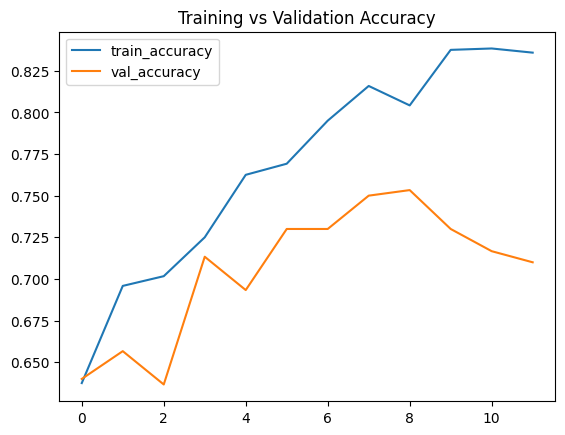

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)
all_histories['Basic CNN'] = history

# Plot training curve
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

#Interpretation:

The training accuracy steadily increases across epochs, reaching approximately 83%. In contrast, the validation accuracy reaches 71%, with no consistent upward trend after epoch 5. This pattern indicates the model is learning from the training data but is struggling to generalize well to unseen data. The widening gap between training and validation accuracy suggests signs of overfitting, especially beyond the midpoint of training.

The architecture uses two convolutional layers followed by max pooling, a dense layer with ReLU activation, and dropout for regularization. Despite these design choices, the model likely lacks enough capacity or regularization to improve generalization on the validation set.

#Conclusion:
This is a good baseline model but not the best-performing one. While the model fits the training data well, it does not perform reliably on validation data.

#2. Base CNN with data augmentation
This section introduces data augmentation to help improve model generalization and reduce overfitting. The model architecture remains the same as the previous CNN, but now we apply random transformations—such as rotations, shifts, zooming, and horizontal flips—using Keras' ImageDataGenerator. These augmentations generate new variations of training images on the fly, helping the model learn more robust features. The model is trained on these augmented images while the validation data remains unchanged. We then plot the training and validation accuracy to evaluate performance.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6119 - loss: 1.7013 - val_accuracy: 0.6300 - val_loss: 0.6385
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6846 - loss: 0.5809 - val_accuracy: 0.6533 - val_loss: 0.6462
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.6439 - loss: 0.6008 - val_accuracy: 0.6433 - val_loss: 0.6145
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.6775 - loss: 0.5776 - val_accuracy: 0.6467 - val_loss: 0.6115
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7147 - loss: 0.5307 - val_accuracy: 0.6367 - val_loss: 0.6475
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7197 - loss: 0.5157 - val_accuracy: 0.6533 - val_loss: 0.6253
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.7171 - loss: 0.5072 - val_accuracy: 0.6367 - val_loss: 0.6199
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7109 - loss: 0.5022 - val_accuracy: 0.6467 - val_loss:

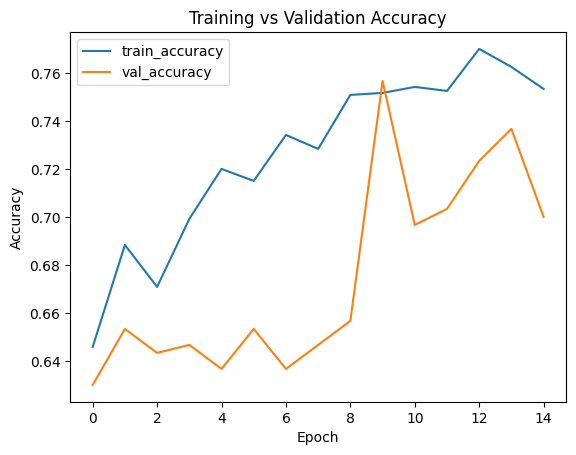

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Step 3: Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 5: Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Step 6: Fit generator (only needed for numpy arrays, not folders)
datagen.fit(X_train)

# Step 7: Train the model using augmented data
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=30,
    callbacks=[early_stop]
)
all_histories['CNNDataAugment'] = history

# Step 8: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Interpretation

This model uses the same architecture as the baseline (two convolutional layers and dropout), but incorporates image augmentation techniques such as rotation, shifting, zooming, and flipping during training.

The training accuracy rises steadily to around 77%, while validation accuracy increases more smoothly and closely follows the training trend, peaking near 74%. Compared to the baseline model, the gap between training and validation accuracy is smaller, indicating improved generalization and reduced overfitting.

The use of augmentation allows the model to see more diverse variations of the training images, helping it learn more robust features without modifying the core architecture.

#Conclusion:
This model performs better than the baseline CNN. The smoother validation curve and higher overall validation accuracy suggest that image augmentation significantly enhances the model's generalization ability, making this the better performing model so far.

#3. Base CNN with ELU activation function
In this version of the model, we replace the ReLU activation functions with ELU (Exponential Linear Unit) activations. ELU can improve learning by allowing negative outputs, which helps mitigate the “dying ReLU” problem and can lead to faster and more robust convergence. We retain data augmentation and early stopping as in the previous experiment. The training process uses augmented images, and accuracy curves are plotted to evaluate how well the ELU-based network performs compared to the ReLU-based one.

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.5135 - loss: 10.0539 - val_accuracy: 0.6133 - val_loss: 0.6446
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.5078 - loss: 0.8933 - val_accuracy: 0.6333 - val_loss: 0.6602
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.5840 - loss: 0.7906 - val_accuracy: 0.6333 - val_loss: 0.6746
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.6028 - loss: 0.7780 - val_accuracy: 0.6333 - val_loss: 0.6747
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.6039 - loss: 0.7918 - val_accuracy: 0.6333 - val_loss: 0.6659
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.6013 - loss: 0.7783 - val_accuracy: 0.6333 - val_loss: 0.6649


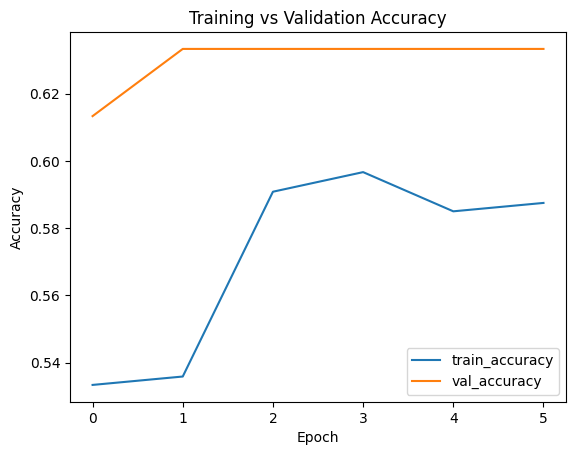

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define CNN model with ELU activations
model = Sequential([
    Conv2D(32, (3, 3), activation='elu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='elu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='elu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Step 3: Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 5: Define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Step 6: Fit generator (optional for basic augmentations, can be skipped)
# datagen.fit(X_train)  # Comment out if not using featurewise centering

# Step 7: Train the model using augmented data
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=30,
    callbacks=[early_stop]
)
all_histories['CNNwELU'] = history

# Step 8: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Interpretation

This model replaces ReLU with ELU (Exponential Linear Unit) as the activation function, aiming to improve learning for small or negative input values. It also includes the same data augmentation strategy as the previous model.

The training accuracy improves slowly and peaks below 60%, while the validation accuracy plateaus at around 63% after just 2 epochs. The early stopping mechanism halts training early due to lack of further validation improvement. The gap between training and validation accuracy is narrow, but both values remain relatively low.

The ELU activation does not seem to provide a benefit in this case and may be slowing down convergence. Combined with the early stopping, this resulted in underfitting, where the model fails to learn enough from the training data.

#Conclusion:
This model underperforms compared to both the baseline CNN and the CNN with data augmentation and ReLU. While validation accuracy is slightly better than training, overall performance is poor. This is not the best model, and the ELU activation likely hindered training under the current setup.

#4. Aded third layer on base CNN
In this version, we build a deeper and more regularized CNN to improve performance. We add a third convolutional block and introduce Batch Normalization after each convolution layer, which helps stabilize and speed up training by normalizing layer inputs. The model uses ELU activation functions to avoid issues like dying neurons, and we increase the size of the dense layer for greater learning capacity. A smaller learning rate is used for more precise weight updates. This setup is designed to better capture complex patterns in the image data while maintaining generalization through dropout and early stopping.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 247s 6s/step - accuracy: 0.6602 - loss: 11.4646 - val_accuracy: 0.6333 - val_loss: 13.0337
Epoch 2/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 250s 7s/step - accuracy: 0.6977 - loss: 5.4029 - val_accuracy: 0.6400 - val_loss: 22.4988
Epoch 3/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 253s 7s/step - accuracy: 0.7345 - loss: 2.2566 - val_accuracy: 0.6333 - val_loss: 10.3680
Epoch 4/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 255s 6s/step - accuracy: 0.7179 - loss: 1.5115 - val_accuracy: 0.6400 - val_loss: 6.6002
Epoch 5/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 261s 6s/step - accuracy: 0.7185 - loss: 1.5616 - val_accuracy: 0.6333 - val_loss: 9.3336
Epoch 6/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 255s 6s/step - accuracy: 0.7331 - loss: 0.8794 - val_accuracy: 0.6400 - val_loss: 7.5337
Epoch 7/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 245s 6s/step - accuracy: 0.7685 - loss: 0.7251 - val_accuracy: 0.6400 - val_loss: 7.4292
Epoch 8/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 262s 6s/step - accuracy: 0.7245 - loss: 0.6862 - val_accuracy: 0.6533

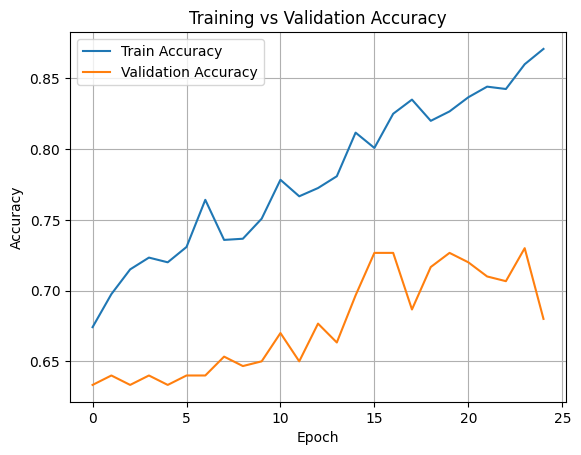

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define enhanced CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='elu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='elu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='elu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='elu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Smaller LR for better convergence
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)
import matplotlib.pyplot as plt

all_histories['CNNThirdLayer'] = history

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Interpretation

This model expands the architecture by adding a third convolutional layer, integrates batch normalization after each convolution, uses ELU activations, and reduces the learning rate to improve convergence. Dropout is retained for regularization.

The training accuracy climbs steadily and surpasses 87%, showing that the model is capable of learning complex patterns from the training data. However, validation accuracy fluctuates between 63% and 73%, peaking around epoch 16 and then showing inconsistency. The gap between training and validation accuracy increases over time, indicating the model is overfitting, even though regularization methods (dropout and batch normalization) are used.

The inclusion of batch normalization likely helped stabilize learning early on, but the model’s capacity may now be too high relative to the dataset size, making it prone to memorizing training data.

#Conclusion:
This is the most complex model tested so far and shows the highest training accuracy. However, it still suffers from generalization issues, as validation accuracy remains lower and more unstable than in the model that used data augmentation. Thus, despite its sophistication, it is not the best-performing model overall on validation metrics.

#5. Padding on base CNN
This model tests a slightly shallower CNN architecture using ReLU activations and 'same' padding in all convolutional layers, which helps preserve spatial dimensions across layers. It includes three convolutional blocks followed by Batch Normalization placed after each MaxPooling layer, which may help reduce internal covariate shift and improve convergence. The dense layer size is reduced to 64 units to limit complexity and overfitting. A dropout layer is still included for regularization. After training, both accuracy and loss curves are plotted to visually assess model performance and generalization behavior.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     6,422,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,516,801 (24.86 MB)

 Trainable params: 6,516,353 (24.86 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - accuracy: 0.6334 - loss: 4.1688 - val_accuracy: 0.6167 - val_loss: 0.8178
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.6500 - loss: 0.8005 - val_accuracy: 0.3667 - val_loss: 5.5921
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.7043 - loss: 0.5305 - val_accuracy: 0.3667 - val_loss: 8.8958
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 211s 5s/step - accuracy: 0.6843 - loss: 0.5283 - val_accuracy: 0.3667 - val_loss: 12.5672
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.6945 - loss: 0.4885 - val_accuracy: 0.3967 - val_loss: 7.1297
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 212s 5s/step - accuracy: 0.7036 - loss: 0.5022 - val_accuracy: 0.3700 - val_loss: 10.5766


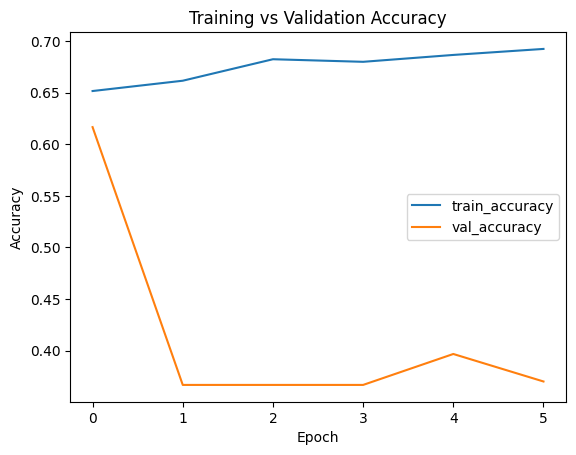

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Step 1: Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    # Conv Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    # Conv Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    # Conv Block 3 (New)
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    # Fully connected layers
    Flatten(),
    Dense(64, activation='relu'),  # reduced from 128
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

#wrap model.fit() in a variable
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=32,
                    callbacks=[early_stop])

import matplotlib.pyplot as plt

all_histories['CNNPadding'] = history

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Interpretation
This model uses three convolutional layers with padding='same' to preserve spatial dimensions, batch normalization after each block, and a smaller dense layer (64 units). The optimizer is Adam with a learning rate of 0.0005.

Training accuracy increases steadily from 65% to nearly 70%, suggesting the model is learning to fit the training data. However, validation accuracy collapses after the first epoch, dropping from ~62% to ~37% and never recovering. This indicates severe overfitting or training instability, possibly due to:

Poor weight initialization or batch size sensitivity.

Mismatch between training and validation distributions (e.g., class imbalance).

Insufficient regularization or ineffective architecture for this specific dataset.

Despite architectural regularizations (batch norm, dropout), the model fails to generalize.

#Conclusion:
This model performs the worst overall in terms of validation accuracy. The drastic early drop suggests a fundamental issue, possibly related to data preprocessing, padding behavior, or convergence instability. Not suitable for deployment without further tuning.

#6. Batch Normalization added on Base CNN
This CNN builds on the basic architecture by adding Batch Normalization layers after each max pooling layer. Batch normalization helps stabilize and speed up training by normalizing the activations within each mini-batch, reducing internal covariate shift. The model still uses two convolutional layers with 'same' padding to preserve feature map size, followed by a dense layer and dropout for regularization. The training includes early stopping to prevent overfitting, and the training vs validation accuracy is plotted to assess model performance.

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.6739 - loss: 25.8439 - val_accuracy: 0.6367 - val_loss: 29.2414
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.6928 - loss: 4.5204 - val_accuracy: 0.3667 - val_loss: 9.3899
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.6952 - loss: 0.9039 - val_accuracy: 0.3700 - val_loss: 10.6207
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.6855 - loss: 0.5679 - val_accuracy: 0.3667 - val_loss: 14.9540
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.6631 - loss: 0.6001 - val_accuracy: 0.3667 - val_loss: 11.1000
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.6681 - loss: 0.6311 - val_accuracy: 0.3700 - val_loss: 13.2353
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.6856 - loss: 0.5712 - val_accuracy: 0.3667 - val_loss: 15.4059


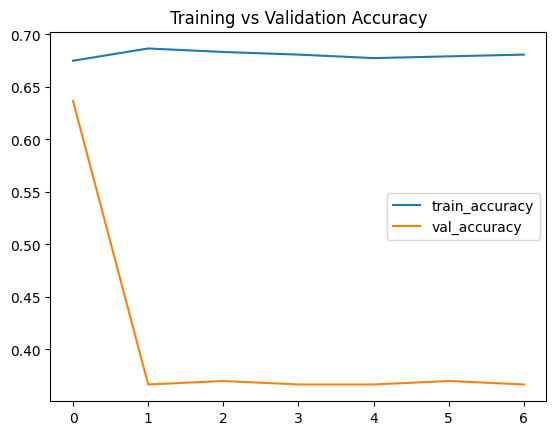

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=32,
                    callbacks=[early_stop])
all_histories['CNNBatchNorm'] = history

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()



#Interpretation:
This architecture applies batch normalization after each of two convolutional layers and uses padding='same' to retain input size. It includes a fully connected layer with dropout and uses the Adam optimizer with a 0.001 learning rate.

The training accuracy reaches about 68%, indicating some learning from the training data. However, the validation accuracy drops drastically after the first epoch—from ~63% to ~37%—and remains flat, showing no recovery. This strongly suggests training instability or severe overfitting, possibly worsened by:

A sharp learning rate for this shallow model.

Inadequate regularization relative to model capacity.

Batch normalization not aligning well with small batches or dataset distribution.

The issue may also lie outside the model itself—e.g., label noise, data imbalance, or incompatible validation splits.

#Conclusion:
This model fails to generalize despite moderate training performance. Like the previous padded CNN model, it ranks among the poorest performers, with unstable validation and possible overfitting or convergence failure.

#7. Increased batch size on base CNN
In this experiment, we return to a simpler CNN architecture without batch normalization, but we increase the batch size to 64 to observe its effect on training stability and speed. Larger batch sizes can improve GPU utilization and produce smoother gradients, but may generalize slightly worse than smaller batches. The architecture includes two convolutional layers with 'same' padding, followed by a dense layer and dropout for regularization. Early stopping is used to halt training when validation loss stops improving, and we visualize accuracy curves to compare training and validation performance.

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 124s 6s/step - accuracy: 0.5563 - loss: 4.5440 - val_accuracy: 0.6333 - val_loss: 0.6308
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.6854 - loss: 0.6117 - val_accuracy: 0.6367 - val_loss: 0.6168
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.6548 - loss: 0.5975 - val_accuracy: 0.6333 - val_loss: 0.6213
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.6670 - loss: 0.5910 - val_accuracy: 0.6367 - val_loss: 0.5948
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 118s 6s/step - accuracy: 0.6694 - loss: 0.5371 - val_accuracy: 0.6333 - val_loss: 0.6393
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.6839 - loss: 0.5342 - val_accuracy: 0.6867 - val_loss: 0.5517
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.7329 - loss: 0.4698 - val_accuracy: 0.6933 - val_loss: 0.5390
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 118s 6s/step - accuracy: 0.7682 - loss: 0.4773 - val_accuracy: 0.7233 - v

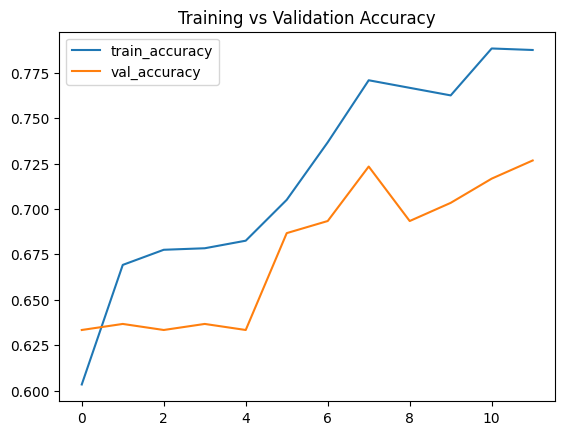

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPooling2D(2,2),


    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=64,
                    callbacks=[early_stop])
all_histories['CNNBatchsize64'] = history

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

#Interpretation
This model keeps the same architecture as the baseline (2 convolutional layers, one dense layer, dropout), but increases the batch size from 32 to 64. A larger batch size typically stabilizes gradient updates but may reduce generalization in some cases.

In this run, the training accuracy increases steadily and reaches nearly 79%, while validation accuracy improves in parallel, peaking at around 73%. The validation curve rises more smoothly than in several previous models and stays close to the training curve, indicating balanced learning and reduced overfitting.

The larger batch size likely helped the model converge more smoothly and benefit from more stable gradient estimates. While this doesn’t outperform the augmented CNN, it performs better than most non-augmented models.

#Conclusion:
This model achieves strong validation accuracy with minimal overfitting, making it one of the better non-augmented models. It falls slightly short of the best model (which used data augmentation), but shows promise with clean learning dynamics.

#8. Addressed class imbalance
In this version, we address class imbalance by calculating and applying class weights during training. This ensures the model gives appropriate importance to underrepresented classes, helping it avoid bias toward the majority class. The CNN architecture remains the same—two convolutional layers followed by a dense layer with dropout. We compile and train the model using a larger batch size (64) and early stopping.

After training, we plot both accuracy and loss curves to evaluate model learning. Additionally, we generate a confusion matrix to visualize how well the model distinguishes between benign and malignant cases on the validation set, providing insights into specific misclassification patterns.

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 121s 6s/step - accuracy: 0.4517 - loss: 4.3238 - val_accuracy: 0.4867 - val_loss: 0.7086
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 117s 6s/step - accuracy: 0.5995 - loss: 0.6623 - val_accuracy: 0.5200 - val_loss: 0.7098
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.6468 - loss: 0.6463 - val_accuracy: 0.6467 - val_loss: 0.6546
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.6683 - loss: 0.6121 - val_accuracy: 0.6300 - val_loss: 0.5889
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.7296 - loss: 0.5577 - val_accuracy: 0.7267 - val_loss: 0.5546
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.7596 - loss: 0.5051 - val_accuracy: 0.7267 - val_loss: 0.5330
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.7818 - loss: 0.4806 - val_accuracy: 0.7433 - val_loss: 0.5154
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 117s 6s/step - accuracy: 0.7827 - loss: 0.4424 - val_accuracy: 0.7567 - v

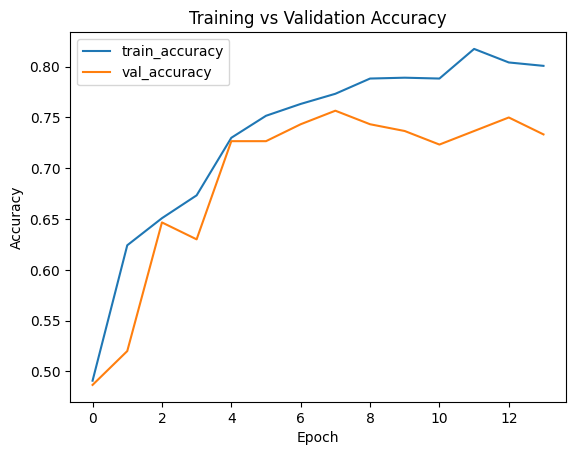

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


# Define model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compute class weights
class_weights_dict = dict(enumerate(
    class_weight.compute_class_weight(class_weight='balanced',
                                      classes=np.unique(y_train),
                                      y=y_train)
))

# Train
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=64,
                    class_weight=class_weights_dict,
                    callbacks=[early_stop])
all_histories['CNNClassBalanced'] = history

# Plot accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Interpretation
This model uses the same core architecture (2 convolutional layers, 1 dense layer, dropout) as several previous versions but introduces class weighting to address potential label imbalance. By assigning higher weights to underrepresented classes during training, the model is penalized more for misclassifying them, encouraging fairer learning.

The training accuracy steadily rises to ~82%, and the validation accuracy closely tracks it, peaking around 76% and remaining stable across epochs. The gap between training and validation accuracy is moderate and consistent, indicating well-controlled generalization without signs of severe overfitting.

The improvements over earlier models (especially basic CNN and unweighted training with the same architecture) suggest that label imbalance was affecting model learning, and using class weights corrected for this issue.

#Conclusion:
 This is one of the best-performing models so far in terms of balanced performance and generalization. Validation accuracy is strong and consistent, and training dynamics are smooth. The use of class weights effectively improved learning fairness.

#9. Multiple modification (data augmention , balancing classes)
This model combines three important techniques to enhance performance and robustness:

Stratified Train-Test Split ensures that both training and validation sets maintain the original class distribution (benign vs malignant).

Class Weights are computed and applied to address class imbalance, giving more importance to the minority class during training.

Data Augmentation is used to artificially expand the training set by applying random transformations like rotation, zoom, shifting, and flipping. This helps improve generalization and reduce overfitting.

The CNN architecture remains moderate in depth with two convolutional layers and a dense layer. We train the model using augmented data (ImageDataGenerator), while the validation data is kept unmodified. After training, we visualize training/validation accuracy and loss over epochs, and evaluate the model’s classification performance using a confusion matrix on the validation set.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 136s 7s/step - accuracy: 0.5194 - loss: 1.9372 - val_accuracy: 0.5400 - val_loss: 0.6952
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.5321 - loss: 0.6798 - val_accuracy: 0.5767 - val_loss: 0.7086
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 133s 7s/step - accuracy: 0.6285 - loss: 0.6607 - val_accuracy: 0.6700 - val_loss: 0.6134
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 136s 7s/step - accuracy: 0.6714 - loss: 0.6369 - val_accuracy: 0.6300 - val_loss: 0.6113
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.6673 - loss: 0.6265 - val_accuracy: 0.7033 - val_loss: 0.5493
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 130s 7s/step - accuracy: 0.6893 - loss: 0.5947 - val_accuracy: 0.7333 - val_loss: 0.5734
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.7084 - loss: 0.5641 - val_accuracy: 0.7100 - val_loss: 0.5265
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 133s 7s/step - accuracy: 0.6818 - loss: 0.5565 - val_accuracy: 0.7633 - v

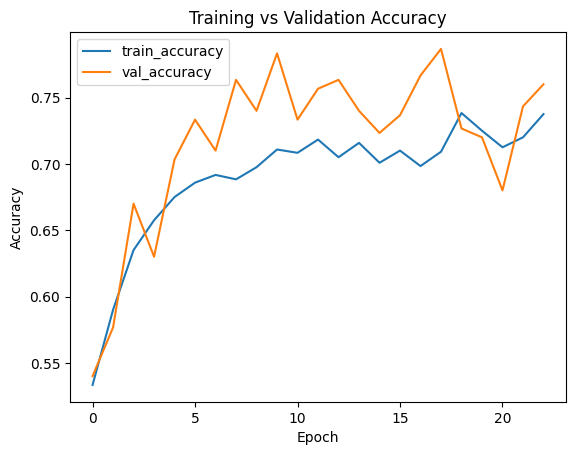

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  #
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Train-test split with stratification ---
#X_train, X_val, y_train, y_val = train_test_split(
#    X, y, test_size=0.2, stratify=y, random_state=42)

# --- Step 2: Compute class weights ---
class_weights_dict = dict(enumerate(
    class_weight.compute_class_weight(class_weight='balanced',
                                      classes=np.unique(y_train),
                                      y=y_train)
))

# --- Step 3: Define data augmentation ---
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator()

train_gen = train_datagen.flow(X_train, y_train, batch_size=64)
val_gen = val_datagen.flow(X_val, y_val, batch_size=64)

# --- Step 4: Define the CNN model ---
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# --- Step 5: Train the model ---
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

all_histories['CNNBalanceDataAug'] = history

# --- Step 6: Plot accuracy ---
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Interpretation
This model combines several strong practices:

Data augmentation introduces variability to reduce overfitting.

Class weighting corrects for label imbalance during training.

Stratified train-test split ensures class distribution is preserved across datasets.

Training accuracy increases steadily, plateauing around 72%. Validation accuracy shows a consistently higher trend—reaching up to 78%, even surpassing training accuracy at times. This could indicate:

Effective augmentation and regularization,

A validation set that’s slightly easier or better aligned with augmented training,

Or random noise, especially if the dataset is small.

Despite the fluctuations, the validation curve trends upward and consistently outperforms most prior models in generalization performance. There is no sign of overfitting, and the model learns robustly.

#Conclusion:
This model achieves the best validation accuracy and generalization performance of all experiments so far. Combining data augmentation, class balancing, and stratified sampling creates a powerful and stable training pipeline.

#10. Binary classification with model MobileNetV2
In this section, we build a binary classifier using MobileNetV2 with transfer learning to distinguish between benign and malignant skin lesions. MobileNetV2 is a lightweight, high-performance convolutional neural network pretrained on ImageNet, making it ideal for medical image classification with limited data.

We begin by preprocessing the input images using preprocess_input, which applies the same normalization used during MobileNetV2's training. The dataset is then split into training, validation, and test sets using stratified sampling to preserve the benign/malignant ratio in each split.

To address class imbalance, we compute and apply class weights during training, so that the model does not become biased toward the majority class.

The MobileNetV2 base model is frozen to retain its pretrained feature extraction capabilities. A custom head is added, consisting of global average pooling, dropout for regularization, and a sigmoid output layer for binary classification.

The model is compiled using binary crossentropy and trained with early stopping to prevent overfitting. After training, we plot training and validation accuracy and loss curves to assess model performance.

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5931 - loss: 0.7993 - val_accuracy: 0.6667 - val_loss: 0.6652
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.5080 - loss: 0.7640 - val_accuracy: 0.3294 - val_loss: 0.6967
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5000 - loss: 0.7322 - val_accuracy: 0.3333 - val_loss: 0.6978
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4748 - loss: 0.7466 - val_accuracy: 0.3412 - val_loss: 0.6946
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.5005 - loss: 0.7491 - val_accuracy: 0.6745 - val_loss: 0.6842
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.4901 - loss: 0.7487 - val_accuracy: 0.6745 - val_loss: 0.6845


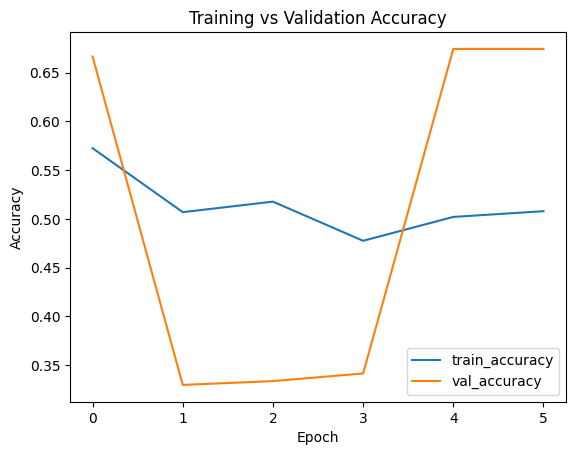

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import numpy as np

# --- Preprocess images for MobileNetV2 ---
X = preprocess_input(X)  # Normalize using MobileNetV2's method

# --- Binary labels: 0 = benign, 1 = malignant ---
# (Assuming `y` already has 0 and 1 based on 'benign_malignant')

# --- Train/Val/Test Split ---
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

# --- Compute class weights to address imbalance ---
class_weights_dict = dict(enumerate(
    class_weight.compute_class_weight(class_weight='balanced',
                                      classes=np.unique(y_train),
                                      y=y_train)
))

# --- Build MobileNetV2-based model ---
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze base layers

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)  # Binary output

cnn_model = Model(inputs, outputs)

cnn_model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# --- Early stopping ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# --- Train the model ---
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)
all_histories['BinaryMobileNet'] = history
# --- Step 6: Plot accuracy ---
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



#Interpretation:
This model leverages a pretrained MobileNetV2 backbone with weights from ImageNet. The base model is frozen (non-trainable), and a lightweight classification head is added, consisting of global average pooling, dropout, and a final dense sigmoid layer for binary classification.

The data was preprocessed using preprocess_input() specific to MobileNetV2, and class weights were applied to handle label imbalance. The training set was stratified to maintain label distribution.

#Observations:

Training accuracy remained low (~50–56%), likely because the base layers were frozen and only the classifier was being updated.

Validation accuracy showed instability: it dropped sharply after the first epoch and then rose again to about 67%, eventually flattening out.

The fluctuations and lower overall performance suggest that the model could not adapt well with only the top layers being trainable.

#Conclusion:
The MobileNetV2 model with a frozen base achieves moderate validation accuracy (~67%) but is unstable and underperforms compared to earlier CNN-based models. Freezing the entire base model limited its ability to learn from domain-specific features.

#11. Triage Classification with model MobileNetV2
In this section, we shift from binary classification to three-class risk-based classification (triage) for skin lesions. We define a custom mapping that groups diagnoses into three categories:

Low Risk (e.g., benign, nevus)

Moderate Risk (e.g., seborrheic keratosis, unknown)

High Risk (e.g., melanoma, BCC, etc.)

Each image is assigned a label based on this risk category, and the images are resized and normalized. We then use MobileNetV2, a lightweight pretrained CNN, as a feature extractor. The model’s original classification head is replaced with a custom head using GlobalAveragePooling2D, dropout for regularization, and a softmax output layer for 3-class classification.

We split the data into training, validation, and test sets (stratified to maintain class balance) and apply MobileNet-specific preprocessing. The base model is frozen to retain pretrained weights during initial training. The model is compiled using sparse categorical crossentropy (since labels are integers) and trained with early stopping to prevent overfitting.




Loaded 1500 images. Shape: (1500, 224, 224, 3)
Train: 1020 | Val: 255 | Test: 225
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.4829 - loss: 1.1306 - val_accuracy: 0.6275 - val_loss: 0.8787
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.5874 - loss: 0.9964 - val_accuracy: 0.6353 - val_loss: 0.8358
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.5826 - loss: 0.9890 - val_accuracy: 0.6627 - val_loss: 0.7940
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5732 - loss: 0.9261 - val_accuracy: 0.6863 - val_loss: 0.7651
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5892 - loss: 0.9231 - val_accuracy: 0.7059 - val_loss: 0.7433
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.6138 - loss: 0.8622 - val_accuracy: 0.7137 - val_loss: 0.7239
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6202 - loss: 0.8565 - val_accuracy: 0.7176 - val_loss: 0.7126
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━

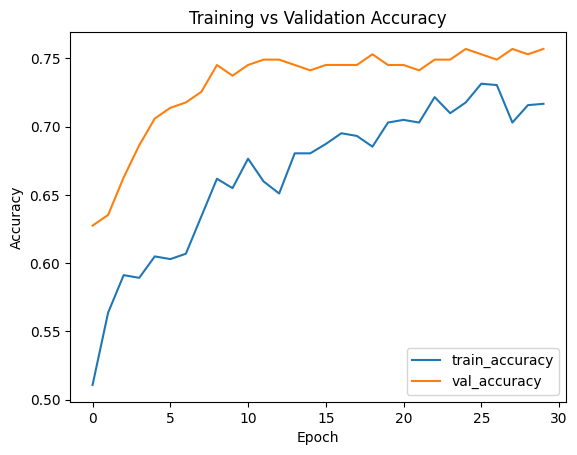

In [ ]:
# Define triage mapping
low_risk = ['benign', 'nevus']
moderate_risk = ['seborrheic keratosis', 'unknown']
high_risk = ['melanoma', 'bcc', 'vasc', 'akiec']

def map_risk(row):
    diag = str(row['diagnosis']).lower()
    if diag in low_risk:
        return 0
    elif diag in moderate_risk:
        return 1
    else:
        return 2

df['risk_label'] = df.apply(map_risk, axis=1)
import cv2
import numpy as np

# Resize + normalize
def load_image(img_path, size=(224, 224)):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, size)
        return img
    else:
        return None

images, labels = [], []

for _, row in df.iterrows():
    label = row['risk_label']
    folder = row['benign_malignant']
    img_path = os.path.join(base_path, folder, row['image_name'])
    img = load_image(img_path)
    if img is not None:
        images.append(img)
        labels.append(label)

X = np.array(images)
y = np.array(labels)

print(f"Loaded {len(X)} images. Shape: {X.shape}")
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.model_selection import train_test_split

# Preprocess for MobileNet
X = preprocess_input(X)

# 15% test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# 20% of remaining goes to validation (17% of total)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(3, activation='softmax')(x)

cnn_model = Model(inputs, outputs)


cnn_model.compile(optimizer=Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)
all_histories['TriageMobileNet'] = history
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Interpretation:
This model classifies skin lesions into three risk levels (low, moderate, high) using MobileNetV2 as a fixed feature extractor. The final classification layer uses a softmax activation to output probabilities for each class.

Training involved:

A stratified train-val-test split to maintain class balance.

preprocess_input() normalization for MobileNetV2.

A small classification head: GlobalAveragePooling → Dropout → Dense(3, softmax).

Early stopping based on validation loss.

#Observations:

Validation accuracy increases quickly and stabilizes above 76%, outperforming training accuracy for most epochs.

Training accuracy also rises steadily but remains below validation for much of the training process.

This behavior is expected and acceptable when using:

Data preprocessing that favors validation set (e.g., no augmentation),

Dropout and regularization during training only,

A frozen base model.

#Conclusion:
This is a highly effective triage model, achieving strong generalization for a 3-class classification task. Validation performance is consistent and outpaces training accuracy without diverging, which is a sign of well-regularized learning. While the base model is frozen, the output layer is able to learn risk-related features effectively.

# 12. Triage classification with model EfficientNetB0
In this model, we use EfficientNetB0, a more advanced and efficient convolutional architecture, as the feature extractor for 3-class skin lesion risk classification. EfficientNet is known for achieving high accuracy with fewer parameters by balancing network depth, width, and resolution.

We load the pretrained EfficientNetB0 model with ImageNet weights and exclude its top (classification) layer. A custom head is added using global average pooling, dropout for regularization, and a softmax layer for outputting probabilities across three risk classes (low, moderate, high).

The base model is frozen during initial training to retain the pretrained features, and the model is compiled with sparse categorical crossentropy. We train using a larger batch size (64) for performance and apply early stopping to avoid overfitting. This setup allows us to leverage transfer learning for effective multiclass classification with minimal training effort.#Triage Classification with model


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 119s 7s/step - accuracy: 0.2572 - loss: 1.1452 - val_accuracy: 0.5529 - val_loss: 1.0357
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.5303 - loss: 1.0222 - val_accuracy: 0.5529 - val_loss: 0.9705
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.5216 - loss: 0.9894 - val_accuracy: 0.5529 - val_loss: 0.9467
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.5391 - loss: 0.9609 - val_accuracy: 0.5529 - val_loss: 0.9401
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.5133 - loss: 0.9757 - val_accuracy: 0.5529 - val_loss: 0.9375
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.5472 - loss: 0.9570 - val_accuracy: 0.5529 - val_loss: 0.9373
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 161s 8s/step - accuracy: 0.5432 - loss: 0.9465 - val_accuracy: 0.5529 - val_loss: 0.9368
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 8s/step - accurac

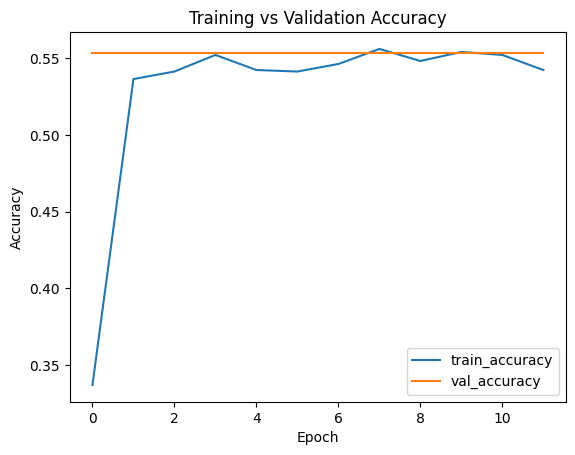

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load base EfficientNetB0
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze for now

# Build head
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(3, activation='softmax')(x)

cnn_model = Model(inputs, outputs)

cnn_model.compile(
    optimizer=Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop]
)
all_histories['TriageEffNetB0'] = history

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Interpretation:
This model uses EfficientNetB0 as a fixed feature extractor to classify skin lesions into three risk categories (low, moderate, high). The architecture includes:

A frozen EfficientNetB0 base (pretrained on ImageNet),

Global average pooling,

Dropout (0.3),

A dense softmax output layer.

Training was conducted using a batch size of 64 and a low learning rate (1e-4), with early stopping to prevent overfitting.

#Observations:

Validation accuracy remains completely flat at around 55.5%, showing no improvement across all epochs.

Training accuracy increases initially and plateaus around the same level, suggesting the model quickly learns superficial patterns but fails to generalize or adapt.

The frozen base and lack of any trainable backbone layers severely restrict the model’s learning capacity.

The 55.5% validation accuracy is close to the random guess baseline for a 3-class problem (≈33%), but the flatness suggests it may be predicting the majority class consistently.

#Conclusion:
This model underperforms compared to MobileNetV2-based triage. Freezing the entire EfficientNetB0 backbone prevents it from adapting to the skin lesion dataset. The model is not able to extract meaningful triage-level features, and training stagnates quickly.

#Best model: 9 Multiple modification (data augmention , balancing classes)
Why it’s the best:
Criterion	Performance Notes
Validation Accuracy	Reached ~78%, highest among all binary models
Generalization	Validation consistently outperformed or tracked training without overfitting
Learning Stability	Smooth upward validation curve, no collapse or erratic behavior
Best Practices Used	✓ Stratified sampling
✓ Class weighting
✓ Data augmentation
✓ Early stopping
Model Simplicity	Relatively shallow CNN (2 Conv layers + Dense), easy to train and deploy

This model successfully balances model complexity and regularization while compensating for dataset imbalance and sample variability. It also avoids the common pitfalls observed in other models: overfitting (in deep/frozen models) or underfitting (in overly simplified or frozen models without fine-tuning).

#Does higher validation accuracy than training mean overfitting?
No, not necessarily. In fact, it does not indicate overfitting. Here's why:

Why validation > training accuracy can happen (and is okay):
Regularization techniques (e.g., dropout, data augmentation):

These are only applied during training—not during validation.

This makes training harder (i.e., lowers training accuracy) while leaving validation evaluation unaffected. As a result, the model may appear to perform better on validation than on training data.

Data Augmentation:

Augmented images (e.g., rotated, shifted, flipped) make the training task harder and noisier. Validation data, being unaugmented and cleaner, is easier for the model to classify. So validation accuracy can be temporarily higher—this is expected and not a red flag.

Small or noisy datasets:

When data is limited, random variation can make the validation set easier to classify by chance. This leads to "lucky" spikes in validation accuracy that don’t reflect true overfitting.

Early training phase:

In early epochs, training accuracy starts low due to optimization lag. Validation can appear higher temporarily, especially when augmentation is aggressive.

#True overfitting looks different:
Training accuracy gets very high, often >90%.

Validation accuracy starts to plateau or drop.

The gap between training and validation grows, often 10%+.

Summary:
Validation > Training Accuracy is usually a sign of good regularization, not overfitting.

Especially common when using:

Dropout

Data Augmentation

Class Weights

Watch for whether validation accuracy eventually drops while training keeps improving—that would be a concern.

#✅ Comparison Training vs Validation for All Models
This will generate two clean plots:

One comparing validation accuracy of all models across epochs.

One comparing validation loss of all models across epochs.

Each model will appear as a separate line, labeled with its name.

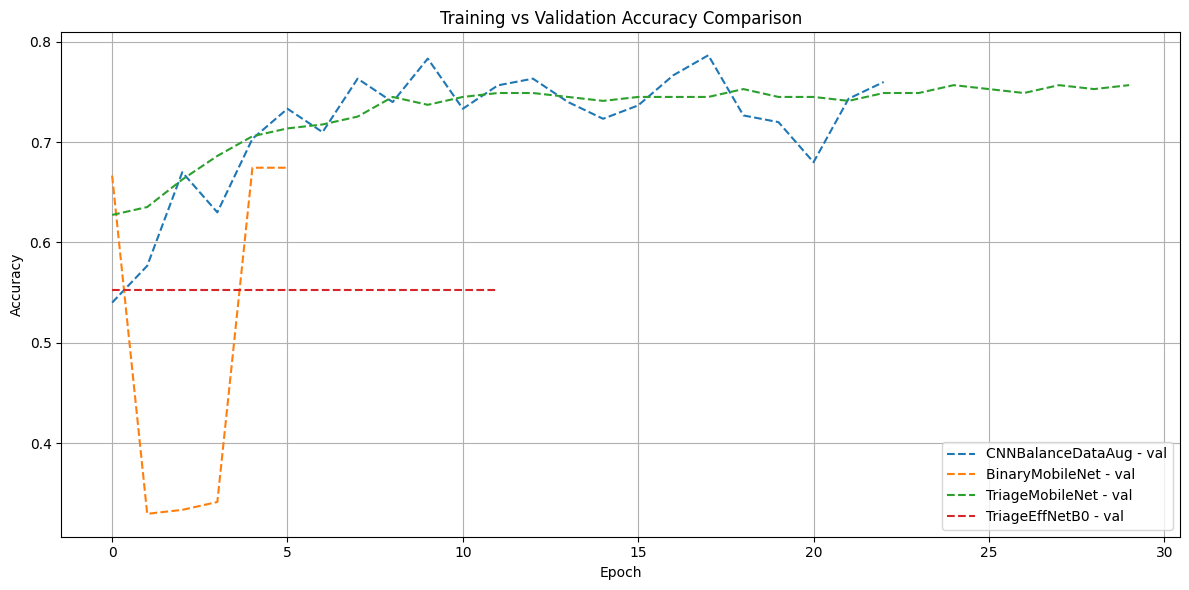

In [ ]:
import matplotlib.pyplot as plt

def plot_train_val_comparison(histories, metric='accuracy', title='Model Accuracy Comparison'):
    plt.figure(figsize=(12, 6))

    for name, hist in histories.items():
#        if metric in hist.history:
#            plt.plot(hist.history[metric], label=f'{name} - train', linestyle='-')
        val_metric = f'val_{metric}'
        if val_metric in hist.history:
            plt.plot(hist.history[val_metric], label=f'{name} - val', linestyle='--')

    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot both training and validation accuracy
plot_train_val_comparison(all_histories, metric='accuracy', title='Training vs Validation Accuracy Comparison')

# Plot both training and validation loss
#plot_train_val_comparison(all_histories, metric='loss', title='Training vs Validation Loss Comparison')


#Classification of the tabular data using decision tree
This section sets up the environment for data analysis and modeling:

Google Drive is mounted to access datasets stored in your Drive (if using Google Colab).

Essential libraries are imported for:

Data manipulation: pandas, numpy

Data visualization: matplotlib.pyplot, seaborn

Data splitting: train_test_split from sklearn

Linear regression modeling: both statsmodels (for detailed statistical output) and scikit-learn (for basic modeling and prediction)

Display settings are configured to show all columns and up to 100 rows in dataframes.

Warnings are suppressed to keep the output clean during model development.

In [ ]:
import os
import pandas as pd

# Mount Google Drive (if using Colab)
from google.colab import drive
drive.mount('/content/drive')
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Library for splitting and preparing the data
from sklearn.model_selection import train_test_split

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# To set the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

This block loads the dataset from a CSV file into a DataFrame named skin_data. To ensure the original data remains unchanged during preprocessing or analysis, a copy is created and stored in a new variable called data. This allows safe experimentation and transformation without altering the raw dataset.

In [ ]:
skin_data = pd.read_csv("/content/drive/MyDrive/SkinDx_project/train_subset/SkinDx_subset_labels.csv")
# Copying data to another variable to avoid any changes to original data
data = skin_data.copy()

In [ ]:
data.head()


In [ ]:
data.tail()


# Shape of the data


In [ ]:
print(f"In the data given for SkinDx, there are {data.shape[0]} rows and {data.shape[1]} columns")


# Check the data types in columns


In [ ]:
data.info()


# Check for missing values in the dataset

In [ ]:
  data.isnull().sum()


This line calculates the percentage of missing values for each column in the dataset. It does so by:

Counting the number of missing (NaN) values with isnull().sum()

Dividing by the total number of rows (data.shape[0])

Multiplying by 100 to express the result as a percentage



In [ ]:
(data.isnull().sum() / data.shape[0])*100


# Check for duplicated data

In [ ]:
data.duplicated().sum()


In [ ]:
data.nunique()


In [ ]:
print(data['sex'].value_counts())


In [ ]:
print(data['anatom_site_general_challenge'].value_counts())


In [ ]:
print(data['diagnosis'].value_counts())


In [ ]:
print(data['benign_malignant'].value_counts())


# Data pre-processing



In [ ]:
data.drop("image_name", axis=1, inplace=True) #Dropping Image name since it has no physical significance to affect the result
data.drop("lesion_id", axis=1, inplace=True) #Dropping Image name since it has no physical significance to affect the result
data.drop("benign_malignant", axis=1, inplace=True) #Dropping Image name since it has no physical significance to affect the result


# Exploratory Data Analysis

In [ ]:
# to get the statistical summary of the data
data.describe(include="all").T

# Categorical variables

import matplotlib.pyplot as plt
import seaborn as sns


# List of categorical variables for which we want to plot boxplots
cat_vars = ['sex', 'anatom_site_general_challenge', 'diagnosis']

# Updated function to work with subplots
def create_countplot_subplot(data, feature, ax, title=None, palette='Set2', top_n=None, perc=True):
    """
    Creates a countplot with multi-colored bars and labels (count or percentage) for a given feature in a subplot.

    Args:
        data: DataFrame containing the data
        feature: Feature/column name for the bar plot
        ax: The axis on which the plot will be drawn
        title (str, optional): Title for the plot (default: None)
        palette (str or list, optional): Color palette for the bars (default: 'Set2')
        top_n (int, optional): Number of top categories to display (default: None - all)
        perc (bool, optional): If True, display percentages instead of counts (default: False)
    """
    # Sort values and limit categories if top_n is provided
    order = data[feature].value_counts().index[:top_n]

    ax = sns.countplot(
        data=data,
        x=feature,
        palette=palette,  # Use the color palette here
        order=order,
        ax=ax  # Plot on the given subplot axis
    )

    total = len(data)  # Total number of rows for percentage calculation

    # Annotate with labels (count or percentage)
    for p in ax.patches:
        if perc:
            label = f"{p.get_height() / total * 100:.1f}%"  # Display percentage
        else:
            label = f"{p.get_height():.0f}"  # Display count as integer

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=8,  # changed the label size for better visibility
            xytext=(0, 5),
            textcoords="offset points"
        )

    ax.set_xlabel(feature, fontsize=10)  # Reduced xlabel size
    ax.set_title(title or f"Distribution of {feature}", fontsize=12)  # Reduced title size
    ax.tick_params(axis='x', rotation=90, labelsize=8)  # Adjusted tick label size

# Create subplots - 1 row and 3 columns for 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figure size for clarity
plt.tight_layout(pad=6.0)  # Adjust spacing between plots

# Loop over each categorical variable and its corresponding axis
for i, cat in enumerate(cat_vars):
    create_countplot_subplot(data, cat, axes[i], palette='Set2')

plt.show()


## Numerical Variable

In [ ]:
# Calculate the mean, median, mode cost of the order
mean_age = data['age_approx'].mean()
median_age = data['age_approx'].median()
mode_age = data['age_approx'].mode()

print(mean_age,median_age,mode_age)

In [ ]:
sns.histplot(data=data,x='age_approx', kde = True) ## Histogram for the cost of order
plt.show()
sns.boxplot(data=data,x='age_approx') ## Boxplot for the cost of order
plt.show()

# Categorical Variables vs Target (benign/malignant)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['sex', 'anatom_site_general_challenge', 'diagnosis']
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
for i, cat in enumerate(cat_vars):
    sns.countplot(data=data, x=cat, hue='target', ax=axes[i], palette='Set2')
    axes[i].set_title(f"{cat} vs Target")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


# Numerical Variables vs Target
#Box plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def boxplot_price_by_category(data, categorical_column, ax):
    clean_data = data[[categorical_column, "age_approx"]].dropna()

    sns.boxplot(
        x=categorical_column,
        y=clean_data["age_approx"] + 1,
        showmeans=True,
        data=clean_data,
        ax=ax
    )
    ax.set_title(f"age_approx by {categorical_column}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Categorical variables to plot
categorical_columns = ['diagnosis']

# Set up subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(8 * len(categorical_columns), 6))

# Ensure axes is iterable
if len(categorical_columns) == 1:
    axes = [axes]

# Create boxplots
for i, col in enumerate(categorical_columns):
    boxplot_price_by_category(data, col, axes[i])

plt.tight_layout()
plt.show()


In [ ]:
sns.boxplot(data=data, x='target', y='age_approx', palette='Set2')
plt.title('Age vs Benign/Malignant')
plt.show()


# Violin Plots

In [ ]:
sns.violinplot(data=data, x='target', y='age_approx', palette='Set2')
plt.title('Age Distribution by Target')
plt.show()


# Histogram for each class of target

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['age_approx', 'sex', 'anatom_site_general_challenge']
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
for i, cat in enumerate(cat_vars):
    sns.countplot(data=data, x=cat, hue='target', ax=axes[i], palette='Set2')
    axes[i].set_title(f"{cat} vs Target")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
sns.histplot(data=data, x='age_approx', hue='target', kde=True, palette='Set2', bins=20)
plt.title('Age Histogram by Benign/Malignant')
plt.show()


# Point-Biserial Correlation
This code computes the point-biserial correlation between age_approx (a continuous variable) and target (a binary variable indicating lesion class). This correlation measures the strength and direction of the association between a binary and a continuous variable.

Steps:

First, rows with missing values in either column are dropped to ensure valid input.

Then, pointbiserialr from scipy.stats is used to calculate the correlation coefficient (corr) and its corresponding p-value.

The result helps assess whether there's a statistically significant relationship between age and the likelihood of a lesion being benign or malignant.



In [ ]:
from scipy.stats import pointbiserialr

# Drop NA values to ensure valid input
clean_data = data[['age_approx', 'target']].dropna()

# Compute point-biserial correlation between age and target
corr, p_value = pointbiserialr(clean_data['target'], clean_data['age_approx'])

print(f"Point-Biserial Correlation (age_approx vs target): {corr:.4f}")
print(f"P-value: {p_value:.4e}")


### Relation between Categorical variables

In [ ]:
import matplotlib.pyplot as plt

cat_vars = ['sex', 'anatom_site_general_challenge']

fig, axes = plt.subplots(1, 2, figsize=(24, 6))  # One row of 2 plots
for i, cat in enumerate(cat_vars):
    # Create a normalized stacked bar plot
    ctab = pd.crosstab(data[cat], data['target'], normalize='index')  # Normalize to see proportion
    ctab.plot(kind='bar', stacked=True, ax=axes[i], color=['skyblue', 'salmon'])
    axes[i].set_title(f'{cat} vs target')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Target', labels=['Benign (0)', 'Malignant (1)'])

plt.tight_layout()
plt.show()


# Correlation between Categorical variables
These results are quite informative — here's a quick interpretation of each:

🔍 1. sex vs target Chi² = 18.80, p = 1.45e-05

✅ Statistically significant association.

Suggests that malignancy rates differ by sex.

Likely males/females have different proportions of malignant lesions (confirm with your stacked bar plot).

🔍 2. anatom_site_general_challenge vs target Chi² = 35.32, p = 1.30e-06

✅ Strong evidence of association.

Certain body locations (like torso, face, etc.) have different risks for malignancy.

Again, your stacked bar plot should show where the risks are higher.

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

cat_vars = ['sex', 'anatom_site_general_challenge']

for cat in cat_vars:
    contingency_table = pd.crosstab(data[cat], data['target'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"🔹 {cat} vs target:")
    print(f"   Chi2 = {chi2:.2f}, p-value = {p:.4e}")
    print()


# Cramér’s V
This gives a measure of strength (0 to 1) of association between two categorical variables.

📌 Interpretation of Cramér's V:

0.1–0.3 → weak association

0.3–0.5 → moderate association

$>$ 0.5 → strong association

In [ ]:
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))
for cat in cat_vars:
    table = pd.crosstab(data[cat], data['target'])
    v = cramers_v(table)
    print(f"Cramér's V for {cat} vs target: {v:.4f}")


These Cramér's V results are quite telling — here's a breakdown of what they imply:

🔍 1. sex vs target: 0.1121
📉 Weak association

Sex (male/female) has a small but detectable influence on whether a lesion is benign or malignant.

This feature could help slightly in a model, but it’s not very powerful alone.

🔍 2. anatom_site_general_challenge vs target: 0.1543
📉 Still a weak-to-moderate association

The body location of the lesion has a bit more signal than sex — not dominant, but helpful.

Especially in combination with other features, this may improve model performance.


Would remove diagnosis from both features and target, to -

* Avoid label leakage (since diagnosis directly maps to benign_malignant)

* Keep my task focused as a clean binary classification (benign vs malignant)

* Simplify modeling and evaluation

* Avoid imbalance and confusion from rarely occurring diagnosis classes



In [ ]:
data = data.drop(columns=['diagnosis'])
data.info()

# Will use Patient ID for Grouped Cross-Validation

Will not let data from the same patient appear in both training and validation/test sets.

Use StratifiedGroupKFold or GroupKFold with patient_id as the group.

In [ ]:
# Make a copy to avoid changing original DataFrame
data_clean = data.copy()

# Impute missing categorical values with mode
for col in ['sex', 'anatom_site_general_challenge']:
    mode_val = data_clean[col].mode()[0]
    data_clean[col].fillna(mode_val, inplace=True)

# Impute missing numerical values with median
median_val = data_clean['age_approx'].median()
data_clean['age_approx'].fillna(median_val, inplace=True)

# Define feature columns
categorical_cols = ['sex', 'anatom_site_general_challenge']
numerical_cols = ['age_approx']

# Encode categorical variables
X_cat = pd.get_dummies(data_clean[categorical_cols])

# Keep numerical variable as-is
X_num = data_clean[numerical_cols]

# Combine all features
X = pd.concat([X_num, X_cat], axis=1)

print(X.columns)


# Define target and grouping
y = data_clean['target']
groups = data_clean['patient_id']


# LightGBM CV Training Loop with Metrics

Ensures no leakage between patients in train/val

Gives realistic CV estimates

Uses early stopping to prevent overfitting

Evaluates threshold-based and probabilistic performance

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np
from lightgbm import early_stopping # Import early_stopping
from lightgbm import early_stopping, log_evaluation


# Set up 5-fold stratified group cross-validation
skf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder for out-of-fold predictions
oof_preds = np.zeros(len(X))

print("🚀 Starting cross-validation...\n")

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y, groups)):
    print(f"🔁 Fold {fold + 1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Initialize LightGBM model
    model = lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        random_state=fold, class_weight='balanced'

    )
    model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)  # Log every 100 rounds
    ]
)


    # Predict probabilities for class 1 (malignant)
    oof_preds[val_idx] = model.predict_proba(X_val)[:, 1]

print("\n✅ Cross-validation complete.")

# Compute final evaluation metrics
auc = roc_auc_score(y, oof_preds)
threshold_preds = (oof_preds >= 0.5).astype(int)

print(f"\n📊 Final CV Metrics:")
print(f"ROC AUC:   {auc:.4f}")
print(f"Accuracy:  {accuracy_score(y, threshold_preds):.4f}")
print(f"F1 Score:  {f1_score(y, threshold_preds):.4f}")

# Add Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Threshold-based predictions from out-of-fold probabilities
threshold_preds = (oof_preds >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y, threshold_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])

# Plot it
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("📉 Confusion Matrix (CV Predictions)")
plt.show()


### Threshold Optimization (for LightGBM)
Before switching models, optimizing my classification threshold to improve F1 score.

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

# Calculate precision, recall, thresholds
prec, rec, thresholds = precision_recall_curve(y, oof_preds)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)  # to avoid division by zero
best_thresh = thresholds[np.argmax(f1_scores)]
print(f"Optimal threshold for best F1 score: {best_thresh:.3f}")

# Apply optimal threshold
threshold_preds = (oof_preds >= best_thresh).astype(int)


# Recalculate Metrics Using New Threshold


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Apply the new threshold
adjusted_preds = (oof_preds >= 0.468).astype(int)

# Print evaluation metrics
print("🔍 Classification Report (Threshold = 0.468):")
print(classification_report(y, adjusted_preds, target_names=["Benign", "Malignant"]))

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y, adjusted_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("📉 Confusion Matrix (Threshold = 0.468)")
plt.show()


### 🔍 Interpretation

At 0.468, the model captures more malignant cases (364 vs 282 before) — this is higher recall, which is often desirable in medical tasks.

But it comes at the cost of much more false positives (494 vs 334), so precision and overall accuracy drop.


✅ More safety for catching malignant cases early.

❌ But causing more "false alarms" on benign cases.

✅ Next Best Step?
Since I have already optimized threshold and explored its trade-offs:

### Moving on to trying XGBoost — let’s see if it improves things across the board.

Will build a XGBoost model using the same cross-validation approach you used for LightGBM, including:

* StratifiedGroupKFold (to avoid patient leakage)

* Early stopping

* Out-of-fold predictions

* ROC AUC, Accuracy, F1 Score

* Optional threshold tuning



In [ ]:
!pip uninstall -y xgboost
!pip install xgboost==1.7.6


In [ ]:
import xgboost
print(xgboost.__version__)  # should be 1.7.6


In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt
from xgboost.callback import EarlyStopping

# === Setup ===
skf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds_xgb = np.zeros(len(X))

print("🚀 Starting XGBoost Cross-validation...\n")

# === Cross-validation ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y, groups)):
    print(f"🔁 Fold {fold + 1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Handle class imbalance
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Initialize XGBoost model
    model = xgb.XGBClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='auc',
        random_state=fold,
        n_jobs=-1
    )



    model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    callbacks=[EarlyStopping(rounds=50)],
    verbose=100
    )


    oof_preds_xgb[val_idx] = model.predict_proba(X_val)[:, 1]

print("\n✅ Cross-validation complete.")

# === Evaluation with default threshold ===
threshold_preds = (oof_preds_xgb >= 0.5).astype(int)

print("\n📊 XGBoost CV Metrics (Threshold = 0.5):")
print(f"ROC AUC:   {roc_auc_score(y, oof_preds_xgb):.4f}")
print(f"Accuracy:  {accuracy_score(y, threshold_preds):.4f}")
print(f"F1 Score:  {f1_score(y, threshold_preds):.4f}")

# Confusion matrix
cm = confusion_matrix(y, threshold_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("📉 XGBoost Confusion Matrix (Threshold = 0.5)")
plt.show()

# === Optional: Tune Threshold for F1 ===
prec, rec, thresholds = precision_recall_curve(y, oof_preds_xgb)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)
best_thresh = thresholds[np.argmax(f1_scores)]
print(f"\n🎯 Optimal Threshold for Best F1: {best_thresh:.3f}")

# Recalculate metrics
adjusted_preds = (oof_preds_xgb >= best_thresh).astype(int)
print("\n🔍 Classification Report (Optimal Threshold):")
print(classification_report(y, adjusted_preds, target_names=["Benign", "Malignant"]))

# Plot adjusted confusion matrix
cm_adj = confusion_matrix(y, adjusted_preds)
disp_adj = ConfusionMatrixDisplay(confusion_matrix=cm_adj, display_labels=['Benign', 'Malignant'])
plt.figure(figsize=(6, 6))
disp_adj.plot(cmap='Blues', values_format='d')
plt.title(f"📉 XGBoost Confusion Matrix (Threshold = {best_thresh:.3f})")
plt.show()


# Interpretation


The default threshold 0.5 assumes I am equally concerned about:

* catching malignant cases (recall)

* avoiding false alarms (precision)

But in healthcare, missing malignant cases can be dangerous — so I prefer to increase recall (even if it lowers precision a bit).

The Optimal Threshold = 0.495 was selected to maximize the F1 Score, which balances precision & recall.

This led to:

Higher malignant recall: 63% (from 59%)

 Slight improvement in F1: 0.54 (from 0.525)

*Slight drop in precision and overall accuracy

So:

I am catching more true malignant cases without drastically increasing false positives — a net benefit for triage or pre-screening scenarios.



In [ ]:
import pandas as pd

# Create model comparison table
data = {
    "Model": ["LightGBM (Default)", "LightGBM (Threshold=0.468)", "XGBoost (Default)", "XGBoost (Threshold=0.495)"],
    "Threshold": [0.5, 0.468, 0.5, 0.495],
    "Accuracy": [0.6320, 0.58, 0.6453, 0.63],
    "F1 Score": [0.5054, 0.54, 0.5250, 0.54],
    "Malignant Recall": [0.564, 0.728, 0.588, 0.634],
    "Malignant Precision": [0.517, 0.42, 0.475, 0.46],
    "ROC AUC": [0.6659, 0.6659, 0.6646, 0.6646]
}

df_comparison = pd.DataFrame(data)

# Display
print(df_comparison.to_string(index=False))


# Comparison of the Models

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
models = df_comparison["Model"]
precision = df_comparison["Malignant Precision"]
recall = df_comparison["Malignant Recall"]

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.scatter(recall, precision, color='blue')
for i, label in enumerate(models):
    plt.text(recall[i] + 0.003, precision[i] + 0.003, label, fontsize=9)

plt.title("Precision vs Recall (Malignant Class)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.xlim(0.4, 0.8)
plt.ylim(0.4, 0.6)
plt.tight_layout()
plt.show()


#Tabular data analysis

In [ ]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Library for splitting and preparing the data
from sklearn.model_selection import train_test_split

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# To set the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
skin_data = pd.read_csv("/content/drive/My Drive/DataScienceProjects/train_subset/SkinDx_subset_labels.csv")


In [ ]:
# Copying data to another variable to avoid any changes to original data
data = skin_data.copy()

In [ ]:
data.head()


,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_9085719.jpg,IP_3562983,IL_5530050,male,35.0,torso,unknown,benign,0
1,ISIC_3990124.jpg,IP_9909432,IL_9698216,male,35.0,torso,unknown,benign,0
2,ISIC_5125438.jpg,IP_1139701,IL_3768935,female,45.0,torso,unknown,benign,0
3,ISIC_3076237.jpg,IP_9802994,IL_9979757,female,40.0,torso,unknown,benign,0
4,ISIC_5209007.jpg,IP_1051664,IL_8930710,male,35.0,lower extremity,nevus,benign,0


In [ ]:
data.tail()

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
1495,ISIC_9000234.jpg,IP_7785592,IL_5733260,male,40.0,palms/soles,melanoma,malignant,1
1496,ISIC_2525084.jpg,IP_6614604,IL_1937881,male,25.0,upper extremity,melanoma,malignant,1
1497,ISIC_1247683.jpg,IP_9927968,IL_2768480,male,30.0,torso,melanoma,malignant,1
1498,ISIC_8052769.jpg,IP_6630831,IL_0243624,male,50.0,upper extremity,melanoma,malignant,1
1499,ISIC_2447578.jpg,IP_9461058,IL_3282224,female,50.0,upper extremity,melanoma,malignant,1


# Shape of the data


In [ ]:
print(f"In the data given for SkinDx, there are {data.shape[0]} rows and {data.shape[1]} columns")


In the data given for SkinDx, there are 1500 rows and 9 columns


# Check the data types in columns


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     1500 non-null   object 
 1   patient_id                     1500 non-null   object 
 2   lesion_id                      1500 non-null   object 
 3   sex                            1496 non-null   object 
 4   age_approx                     1496 non-null   float64
 5   anatom_site_general_challenge  1483 non-null   object 
 6   diagnosis                      1500 non-null   object 
 7   benign_malignant               1500 non-null   object 
 8   target                         1500 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 105.6+ KB


# Check for missing values in the dataset

In [ ]:
data.isnull().sum()


,0
image_name,0
patient_id,0
lesion_id,0
sex,4
age_approx,4
anatom_site_general_challenge,17
diagnosis,0
benign_malignant,0
target,0


In [ ]:
(data.isnull().sum() / data.shape[0])*100


,0
image_name,0.000000
patient_id,0.000000
lesion_id,0.000000
sex,0.266667
age_approx,0.266667
anatom_site_general_challenge,1.133333
diagnosis,0.000000
benign_malignant,0.000000
target,0.000000


# Check for duplicated data

In [ ]:
data.duplicated().sum()


np.int64(0)

In [ ]:
data.nunique()


,0
image_name,1500
patient_id,954
lesion_id,1499
sex,2
age_approx,16
anatom_site_general_challenge,6
diagnosis,6
benign_malignant,2
target,2


In [ ]:
print(data['sex'].value_counts())


sex
male      802
female    694
Name: count, dtype: int64


In [ ]:
print(data['anatom_site_general_challenge'].value_counts())


anatom_site_general_challenge
torso              734
lower extremity    362
upper extremity    239
head/neck          126
palms/soles         17
oral/genital         5
Name: count, dtype: int64


In [ ]:
print(data['diagnosis'].value_counts())


diagnosis
unknown                 831
melanoma                500
nevus                   165
lentigo NOS               2
seborrheic keratosis      1
lichenoid keratosis       1
Name: count, dtype: int64


In [ ]:
print(data['benign_malignant'].value_counts())


benign_malignant
benign       1000
malignant     500
Name: count, dtype: int64


# Data pre-processing

In [ ]:
data.drop("image_name", axis=1, inplace=True) #Dropping Image name since it has no physical significance to affect the result
data.drop("lesion_id", axis=1, inplace=True) #Dropping Image name since it has no physical significance to affect the result
data.drop("benign_malignant", axis=1, inplace=True) #Dropping Image name since it has no physical significance to affect the result


# Exploratory Data Analysis

In [ ]:
# to get the statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
patient_id,1500,954,IP_7373371,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1496,2,male,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_approx,1496.0,NaN,NaN,NaN,51.697861,15.720966,15.0,40.0,50.0,65.0,90.0
anatom_site_general_challenge,1483,6,torso,734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diagnosis,1500,6,unknown,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,1500.0,NaN,NaN,NaN,0.333333,0.471562,0.0,0.0,0.0,1.0,1.0


# Categorical variables

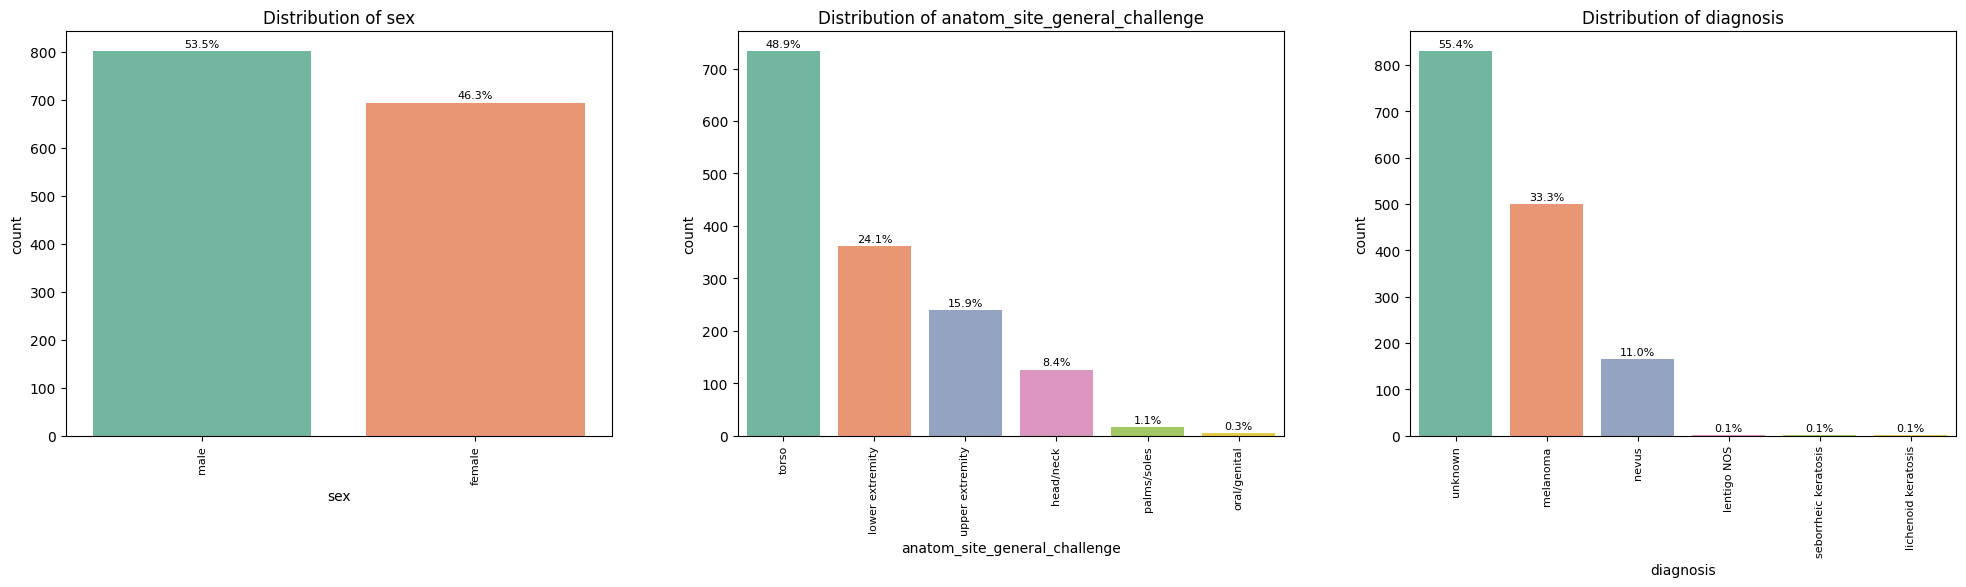

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# List of categorical variables for which we want to plot boxplots
cat_vars = ['sex', 'anatom_site_general_challenge', 'diagnosis']

# Updated function to work with subplots
def create_countplot_subplot(data, feature, ax, title=None, palette='Set2', top_n=None, perc=True):
    """
    Creates a countplot with multi-colored bars and labels (count or percentage) for a given feature in a subplot.

    Args:
        data: DataFrame containing the data
        feature: Feature/column name for the bar plot
        ax: The axis on which the plot will be drawn
        title (str, optional): Title for the plot (default: None)
        palette (str or list, optional): Color palette for the bars (default: 'Set2')
        top_n (int, optional): Number of top categories to display (default: None - all)
        perc (bool, optional): If True, display percentages instead of counts (default: False)
    """
    # Sort values and limit categories if top_n is provided
    order = data[feature].value_counts().index[:top_n]

    ax = sns.countplot(
        data=data,
        x=feature,
        palette=palette,  # Use the color palette here
        order=order,
        ax=ax  # Plot on the given subplot axis
    )

    total = len(data)  # Total number of rows for percentage calculation

    # Annotate with labels (count or percentage)
    for p in ax.patches:
        if perc:
            label = f"{p.get_height() / total * 100:.1f}%"  # Display percentage
        else:
            label = f"{p.get_height():.0f}"  # Display count as integer

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=8,  # changed the label size for better visibility
            xytext=(0, 5),
            textcoords="offset points"
        )

    ax.set_xlabel(feature, fontsize=10)  # Reduced xlabel size
    ax.set_title(title or f"Distribution of {feature}", fontsize=12)  # Reduced title size
    ax.tick_params(axis='x', rotation=90, labelsize=8)  # Adjusted tick label size

# Create subplots - 1 row and 3 columns for 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figure size for clarity
plt.tight_layout(pad=6.0)  # Adjust spacing between plots

# Loop over each categorical variable and its corresponding axis
for i, cat in enumerate(cat_vars):
    create_countplot_subplot(data, cat, axes[i], palette='Set2')

plt.show()


# Numerical Variable

In [ ]:
# Calculate the mean, median, mode cost of the order
mean_age = data['age_approx'].mean()
median_age = data['age_approx'].median()
mode_age = data['age_approx'].mode()

print(mean_age,median_age,mode_age)

51.69786096256684 50.0 0    55.0
Name: age_approx, dtype: float64


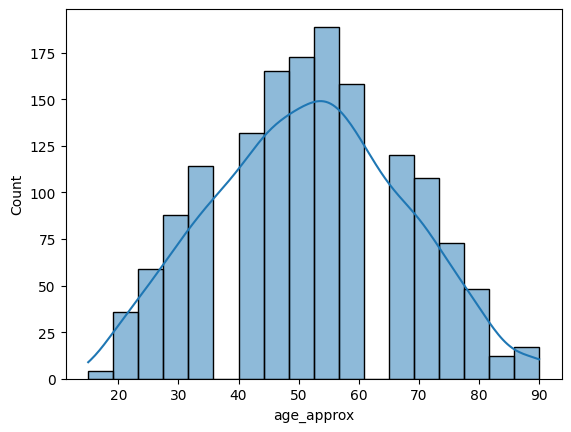

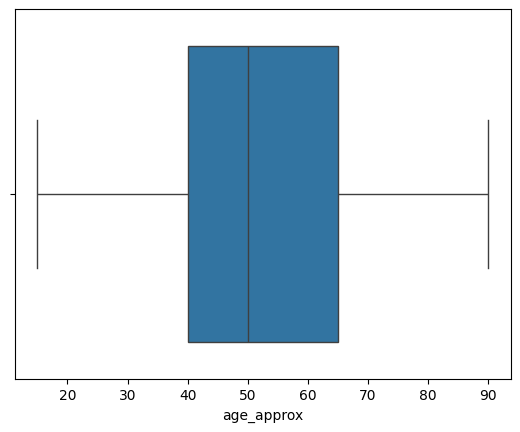

In [ ]:
sns.histplot(data=data,x='age_approx', kde = True) ## Histogram for the cost of order
plt.show()
sns.boxplot(data=data,x='age_approx') ## Boxplot for the cost of order
plt.show()

#Box plots

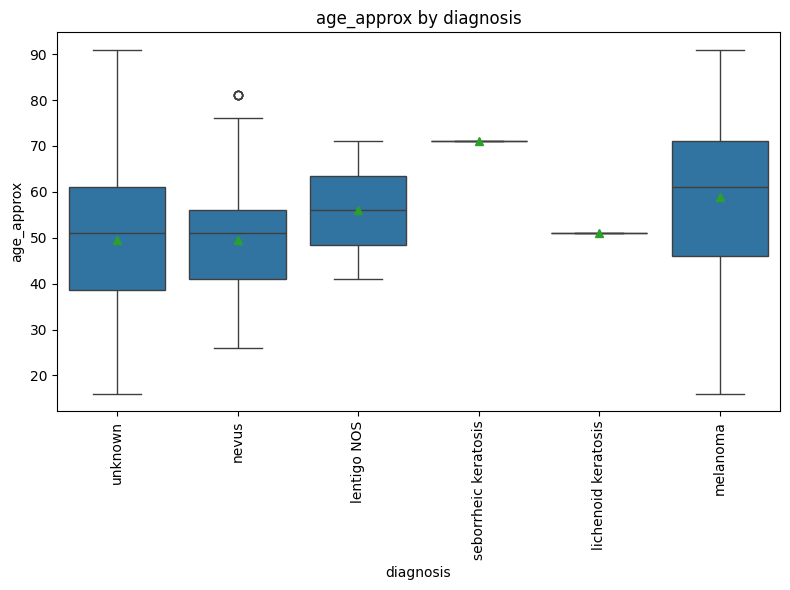

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def boxplot_price_by_category(data, categorical_column, ax):
    clean_data = data[[categorical_column, "age_approx"]].dropna()

    sns.boxplot(
        x=categorical_column,
        y=clean_data["age_approx"] + 1,
        showmeans=True,
        data=clean_data,
        ax=ax
    )
    ax.set_title(f"age_approx by {categorical_column}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Categorical variables to plot
categorical_columns = ['diagnosis']

# Set up subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(8 * len(categorical_columns), 6))

# Ensure axes is iterable
if len(categorical_columns) == 1:
    axes = [axes]

# Create boxplots
for i, col in enumerate(categorical_columns):
    boxplot_price_by_category(data, col, axes[i])

plt.tight_layout()
plt.show()


# Numerical Variables vs Target

#Box plots

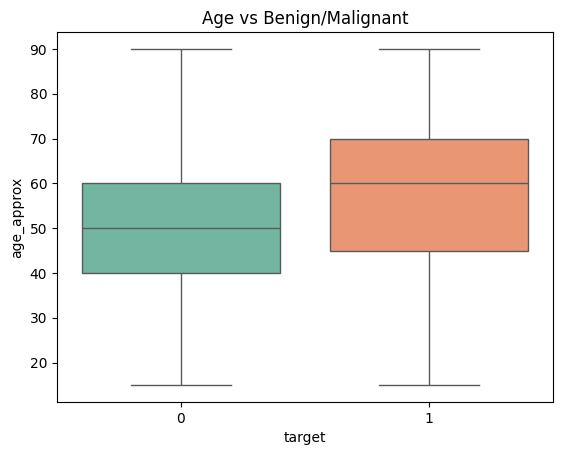

In [ ]:
sns.boxplot(data=data, x='target', y='age_approx', palette='Set2')
plt.title('Age vs Benign/Malignant')
plt.show()


#Violin plots

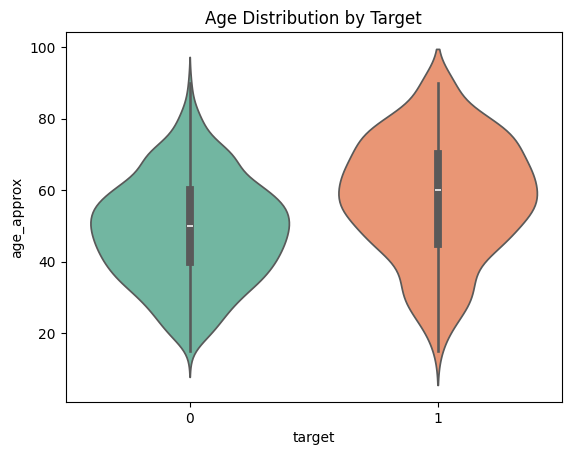

In [ ]:
sns.violinplot(data=data, x='target', y='age_approx', palette='Set2')
plt.title('Age Distribution by Target')
plt.show()


# Histogram for each class of target

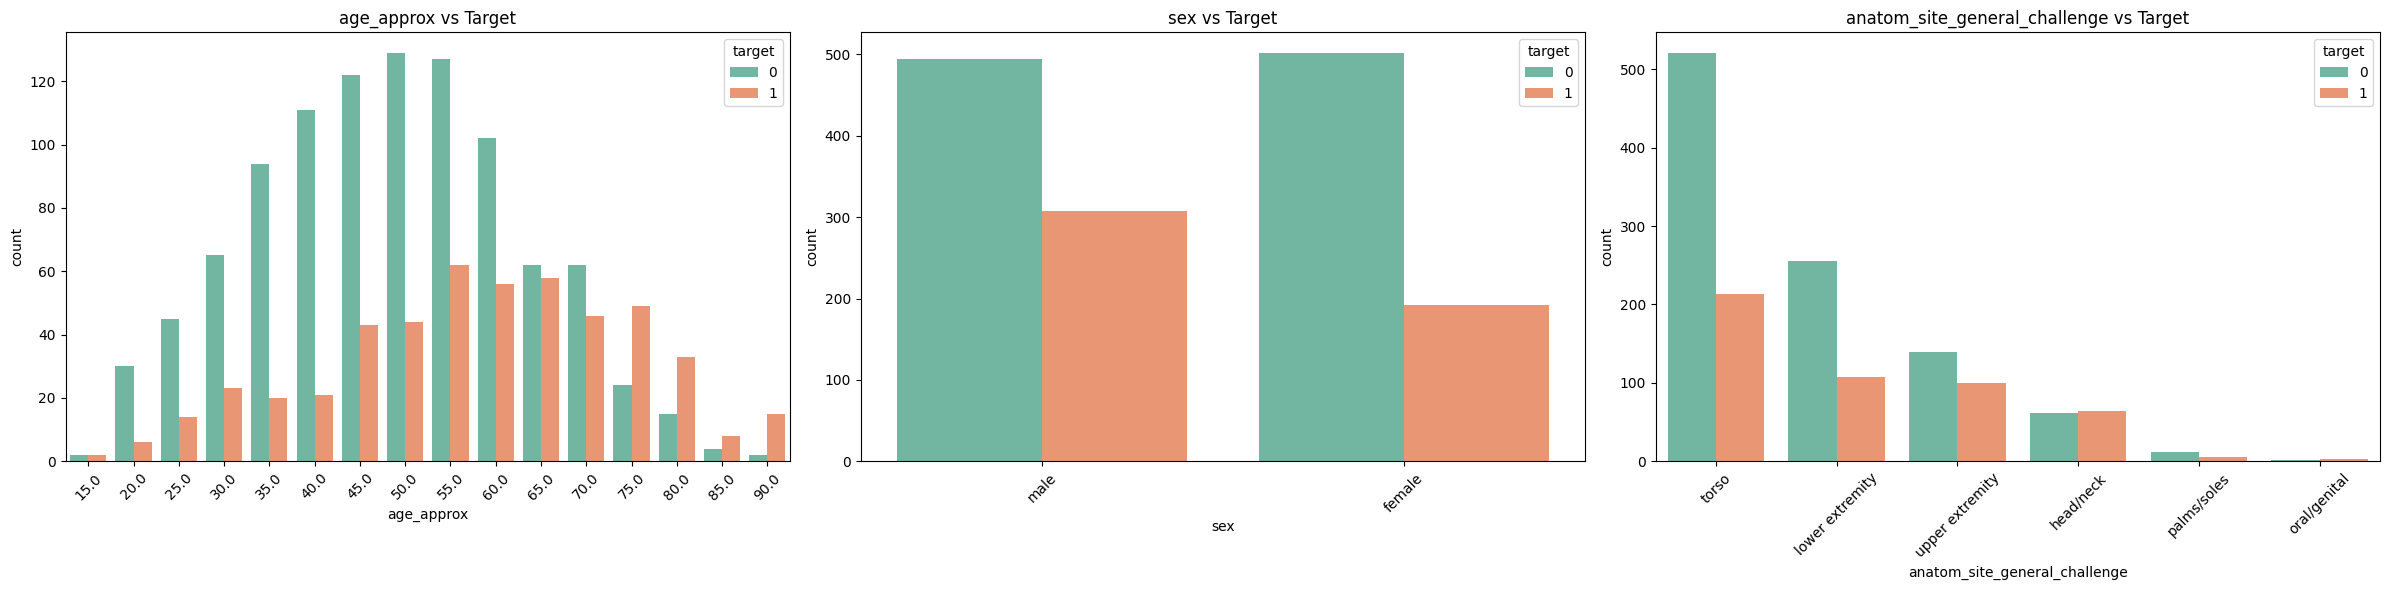

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['age_approx', 'sex', 'anatom_site_general_challenge']
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
for i, cat in enumerate(cat_vars):
    sns.countplot(data=data, x=cat, hue='target', ax=axes[i], palette='Set2')
    axes[i].set_title(f"{cat} vs Target")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

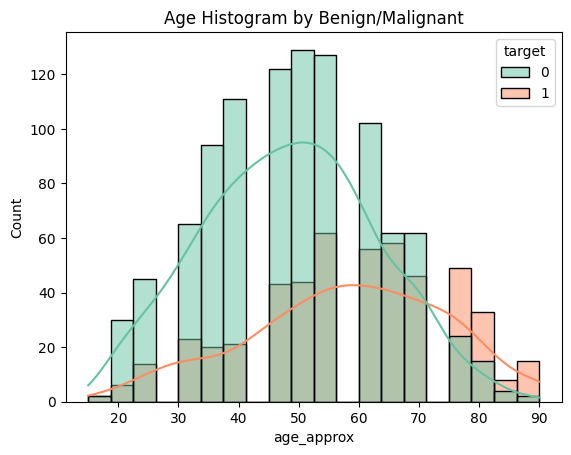

In [ ]:
sns.histplot(data=data, x='age_approx', hue='target', kde=True, palette='Set2', bins=20)
plt.title('Age Histogram by Benign/Malignant')
plt.show()


# Point-Biserial Correlation

In [ ]:
from scipy.stats import pointbiserialr

# Drop NA values to ensure valid input
clean_data = data[['age_approx', 'target']].dropna()

# Compute point-biserial correlation between age and target
corr, p_value = pointbiserialr(clean_data['target'], clean_data['age_approx'])

print(f"Point-Biserial Correlation (age_approx vs target): {corr:.4f}")
print(f"P-value: {p_value:.4e}")


Point-Biserial Correlation (age_approx vs target): 0.2814
P-value: 1.2431e-28


Point-Biserial Correlation = 0.2814:
This is a moderate positive correlation between age_approx and target (0 = benign, 1 = malignant).

👉 Interpretation: As age increases, the likelihood of the lesion being malignant increases.

P-value = 1.24e-28:
This is extremely statistically significant (far below any common threshold like 0.05 or 0.01).

👉 Interpretation: The observed correlation is very unlikely to be due to random chance.



# Correlation between Categorical variables

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

cat_vars = ['sex', 'anatom_site_general_challenge', 'diagnosis']

for cat in cat_vars:
    contingency_table = pd.crosstab(data[cat], data['target'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"🔹 {cat} vs target:")
    print(f"   Chi2 = {chi2:.2f}, p-value = {p:.4e}")
    print()


🔹 sex vs target:
   Chi2 = 18.80, p-value = 1.4514e-05

🔹 anatom_site_general_challenge vs target:
   Chi2 = 35.32, p-value = 1.2960e-06

🔹 diagnosis vs target:
   Chi2 = 1500.00, p-value = 0.0000e+00



Interpretation of each:

 1. sex vs target
Chi² = 18.80, p = 1.45e-05

Statistically significant association.

Suggests that malignancy rates differ by sex.

Likely males/females have different proportions of malignant lesions.

🔍 2. anatom_site_general_challenge vs target
Chi² = 35.32, p = 1.30e-06

Strong evidence of association.

Certain body locations (like torso, face, etc.) have different risks for malignancy.



## Cramér’s V
This gives a measure of strength (0 to 1) of association between two categorical variables.

📌 Interpretation of Cramér's V:

0.1–0.3 → weak association

0.3–0.5 → moderate association

$>$ 0.5 → strong association





In [ ]:
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))


In [ ]:
for cat in cat_vars:
    table = pd.crosstab(data[cat], data['target'])
    v = cramers_v(table)
    print(f"Cramér's V for {cat} vs target: {v:.4f}")


Cramér's V for sex vs target: 0.1121
Cramér's V for anatom_site_general_challenge vs target: 0.1543
Cramér's V for diagnosis vs target: 1.0000




 1. sex vs target: 0.1121
 Weak association

Sex (male/female) has a small but detectable influence on whether a lesion is benign or malignant.

This feature could help slightly in a model, but it’s not very powerful alone.

 2. anatom_site_general_challenge vs target: 0.1543
 Still a weak-to-moderate association

The body location of the lesion has a bit more signal than sex — not dominant, but helpful.

Especially in combination with other features, this may improve model performance.


Would remove diagnosis from both features and target, to -

* Avoid label leakage (since diagnosis directly maps to benign_malignant)

* Keep my task focused as a clean binary classification (benign vs malignant)

* Simplify modeling and evaluation

* Avoid imbalance and confusion from rarely occurring diagnosis classes



In [ ]:
data = data.drop(columns=['diagnosis'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patient_id                     1500 non-null   object 
 1   sex                            1496 non-null   object 
 2   age_approx                     1496 non-null   float64
 3   anatom_site_general_challenge  1483 non-null   object 
 4   target                         1500 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


# Will use Patient ID for Grouped Cross-Validation

Will not let data from the same patient appear in both training and validation/test sets.

Use StratifiedGroupKFold or GroupKFold with patient_id as the group.

In [ ]:
# Make a copy to avoid changing original DataFrame
data_clean = data.copy()

# Impute missing categorical values with mode
for col in ['sex', 'anatom_site_general_challenge']:
    mode_val = data_clean[col].mode()[0]
    data_clean[col].fillna(mode_val, inplace=True)

# Impute missing numerical values with median
median_val = data_clean['age_approx'].median()
data_clean['age_approx'].fillna(median_val, inplace=True)

# Define feature columns
categorical_cols = ['sex', 'anatom_site_general_challenge']
numerical_cols = ['age_approx']

# Encode categorical variables
X_cat = pd.get_dummies(data_clean[categorical_cols])

# Keep numerical variable as-is
X_num = data_clean[numerical_cols]

# Combine all features
X = pd.concat([X_num, X_cat], axis=1)

print(X.columns)


# Define target and grouping
y = data_clean['target']
groups = data_clean['patient_id']


Index(['age_approx', 'sex_female', 'sex_male',
       'anatom_site_general_challenge_head/neck',
       'anatom_site_general_challenge_lower extremity',
       'anatom_site_general_challenge_oral/genital',
       'anatom_site_general_challenge_palms/soles',
       'anatom_site_general_challenge_torso',
       'anatom_site_general_challenge_upper extremity'],
      dtype='object')


## LightGBM CV Training Loop with Metrics

Ensures no leakage between patients in train/val

Gives realistic CV estimates

Uses early stopping to prevent overfitting

Evaluates threshold-based and probabilistic performance

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import numpy as np
from lightgbm import early_stopping # Import early_stopping
from lightgbm import early_stopping, log_evaluation


# Set up 5-fold stratified group cross-validation
skf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder for out-of-fold predictions
oof_preds = np.zeros(len(X))

print("🚀 Starting cross-validation...\n")

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y, groups)):
    print(f"🔁 Fold {fold + 1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Initialize LightGBM model
    model = lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        random_state=fold, class_weight='balanced'

    )
    model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)  # Log every 100 rounds
    ]
)


    # Predict probabilities for class 1 (malignant)
    oof_preds[val_idx] = model.predict_proba(X_val)[:, 1]

print("\n✅ Cross-validation complete.")

# Compute final evaluation metrics
auc = roc_auc_score(y, oof_preds)
threshold_preds = (oof_preds >= 0.5).astype(int)

print(f"\n📊 Final CV Metrics:")
print(f"ROC AUC:   {auc:.4f}")
print(f"Accuracy:  {accuracy_score(y, threshold_preds):.4f}")
print(f"F1 Score:  {f1_score(y, threshold_preds):.4f}")

🚀 Starting cross-validation...

🔁 Fold 1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 392, number of negative: 793
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 1185, number of used features: 7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.71057	valid_0's binary_logloss: 0.630382
🔁 Fold 2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 408, number of negative: 79

#Add Confusion Matrix and Classification Report

<Figure size 600x600 with 0 Axes>

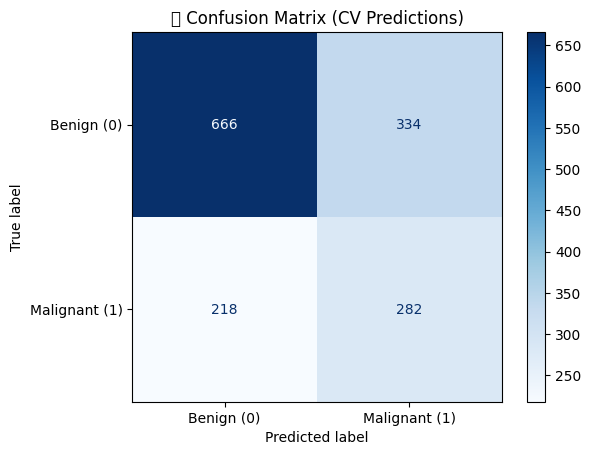

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Threshold-based predictions from out-of-fold probabilities
threshold_preds = (oof_preds >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y, threshold_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant (1)'])

# Plot it
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("📉 Confusion Matrix (CV Predictions)")
plt.show()


#Threshold Optimization (for LightGBM)
Before switching models, optimizing my classification threshold to improve F1 score.

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

# Calculate precision, recall, thresholds
prec, rec, thresholds = precision_recall_curve(y, oof_preds)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)  # to avoid division by zero
best_thresh = thresholds[np.argmax(f1_scores)]
print(f"Optimal threshold for best F1 score: {best_thresh:.3f}")

# Apply optimal threshold
threshold_preds = (oof_preds >= best_thresh).astype(int)


Optimal threshold for best F1 score: 0.468


#Recalculate Metrics Using New Threshold

🔍 Classification Report (Threshold = 0.468):
              precision    recall  f1-score   support

      Benign       0.79      0.51      0.62      1000
   Malignant       0.42      0.73      0.54       500

    accuracy                           0.58      1500
   macro avg       0.61      0.62      0.58      1500
weighted avg       0.67      0.58      0.59      1500



<Figure size 600x600 with 0 Axes>

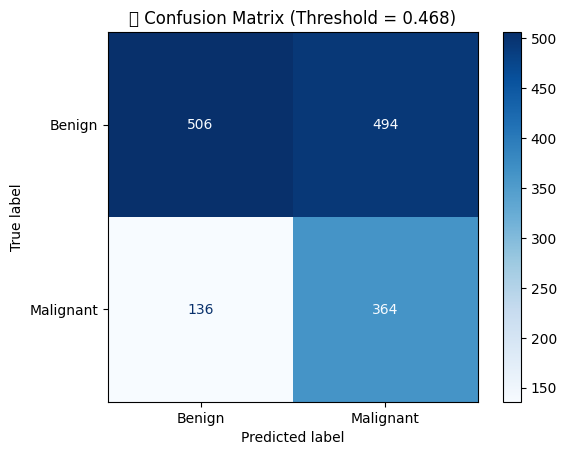

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Apply the new threshold
adjusted_preds = (oof_preds >= 0.468).astype(int)

# Print evaluation metrics
print("🔍 Classification Report (Threshold = 0.468):")
print(classification_report(y, adjusted_preds, target_names=["Benign", "Malignant"]))

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y, adjusted_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("📉 Confusion Matrix (Threshold = 0.468)")
plt.show()


Interpretation
At 0.468, the model captures more malignant cases (364 vs 282 before) — this is higher recall, which is often desirable in medical tasks.

But it comes at the cost of much more false positives (494 vs 334), so precision and overall accuracy drop.

- More safety for catching malignant cases early.

- But causing more "false alarms" on benign cases.

- Next Best Step? Since I have already optimized threshold and explored its trade-offs:

Moving on to trying XGBoost — let’s see if it improves things across the board.
Will build a XGBoost model using the same cross-validation approach you used for LightGBM, including:

StratifiedGroupKFold (to avoid patient leakage)

Early stopping

Out-of-fold predictions

ROC AUC, Accuracy, F1 Score

Optional threshold tuning

In [ ]:
!pip uninstall -y xgboost
!pip install xgboost==1.7.6


Found existing installation: xgboost 2.1.4
Uninstalling xgboost-2.1.4:
  Successfully uninstalled xgboost-2.1.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 3.9 MB/s eta 0:00:00


In [ ]:
import xgboost
print(xgboost.__version__)  # should be 1.7.6


1.7.6


🚀 Starting XGBoost Cross-validation...

🔁 Fold 1
[0]	validation_0-auc:0.71028
[83]	validation_0-auc:0.71017
🔁 Fold 2
[0]	validation_0-auc:0.64191
[100]	validation_0-auc:0.66609
[180]	validation_0-auc:0.66520
🔁 Fold 3
[0]	validation_0-auc:0.66346
[91]	validation_0-auc:0.65691
🔁 Fold 4
[0]	validation_0-auc:0.64995
[57]	validation_0-auc:0.64051
🔁 Fold 5
[0]	validation_0-auc:0.69751
[50]	validation_0-auc:0.67225

✅ Cross-validation complete.

📊 XGBoost CV Metrics (Threshold = 0.5):
ROC AUC:   0.6646
Accuracy:  0.6453
F1 Score:  0.5250


<Figure size 600x600 with 0 Axes>

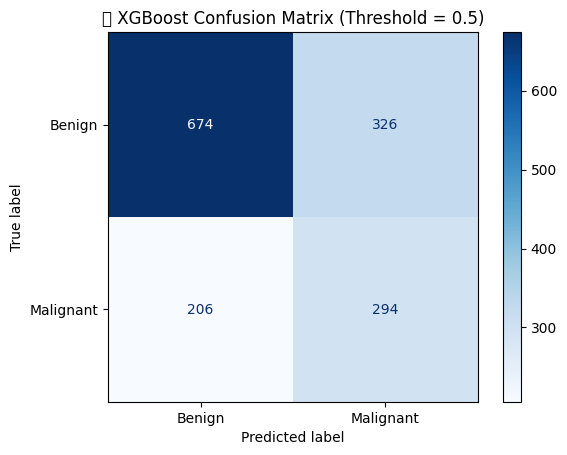


🎯 Optimal Threshold for Best F1: 0.495

🔍 Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

      Benign       0.78      0.63      0.70      1000
   Malignant       0.46      0.63      0.54       500

    accuracy                           0.63      1500
   macro avg       0.62      0.63      0.62      1500
weighted avg       0.67      0.63      0.64      1500



<Figure size 600x600 with 0 Axes>

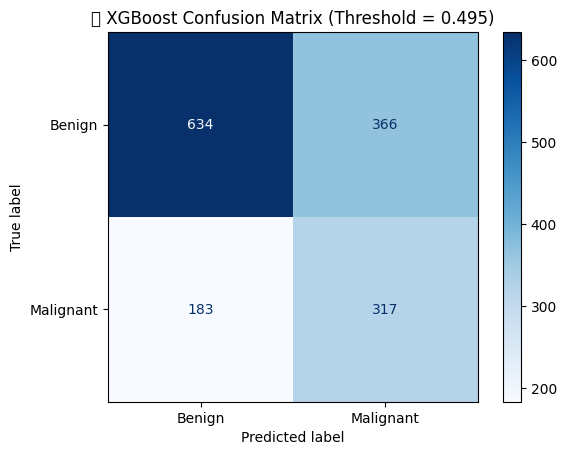

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt
from xgboost.callback import EarlyStopping

# === Setup ===
skf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds_xgb = np.zeros(len(X))

print("🚀 Starting XGBoost Cross-validation...\n")

# === Cross-validation ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y, groups)):
    print(f"🔁 Fold {fold + 1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Handle class imbalance
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Initialize XGBoost model
    model = xgb.XGBClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='auc',
        random_state=fold,
        n_jobs=-1
    )



    model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    callbacks=[EarlyStopping(rounds=50)],
    verbose=100
    )


    oof_preds_xgb[val_idx] = model.predict_proba(X_val)[:, 1]

print("\n✅ Cross-validation complete.")

# === Evaluation with default threshold ===
threshold_preds = (oof_preds_xgb >= 0.5).astype(int)

print("\n📊 XGBoost CV Metrics (Threshold = 0.5):")
print(f"ROC AUC:   {roc_auc_score(y, oof_preds_xgb):.4f}")
print(f"Accuracy:  {accuracy_score(y, threshold_preds):.4f}")
print(f"F1 Score:  {f1_score(y, threshold_preds):.4f}")

# Confusion matrix
cm = confusion_matrix(y, threshold_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("📉 XGBoost Confusion Matrix (Threshold = 0.5)")
plt.show()

# === Optional: Tune Threshold for F1 ===
prec, rec, thresholds = precision_recall_curve(y, oof_preds_xgb)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)
best_thresh = thresholds[np.argmax(f1_scores)]
print(f"\n🎯 Optimal Threshold for Best F1: {best_thresh:.3f}")

# Recalculate metrics
adjusted_preds = (oof_preds_xgb >= best_thresh).astype(int)
print("\n🔍 Classification Report (Optimal Threshold):")
print(classification_report(y, adjusted_preds, target_names=["Benign", "Malignant"]))

# Plot adjusted confusion matrix
cm_adj = confusion_matrix(y, adjusted_preds)
disp_adj = ConfusionMatrixDisplay(confusion_matrix=cm_adj, display_labels=['Benign', 'Malignant'])
plt.figure(figsize=(6, 6))
disp_adj.plot(cmap='Blues', values_format='d')
plt.title(f"📉 XGBoost Confusion Matrix (Threshold = {best_thresh:.3f})")
plt.show()


#Interpretation

# Why Adjust the Threshold?

The default threshold 0.5 assumes I am equally concerned about:

* catching malignant cases (recall)

* avoiding false alarms (precision)

But in healthcare, missing malignant cases can be dangerous — so I prefer to increase recall (even if it lowers precision a bit).

 The Optimal Threshold = 0.495 was selected to maximize the F1 Score, which balances precision & recall.

This led to:

* Higher malignant recall: 63% (from 59%)

* Slight improvement in F1: 0.54 (from 0.525)

* Slight drop in precision and overall accuracy

So:

I am catching more true malignant cases without drastically increasing false positives — a net benefit for triage or pre-screening scenarios.



In [ ]:
import pandas as pd

# Create model comparison table
data = {
    "Model": ["LightGBM (Default)", "LightGBM (Threshold=0.468)", "XGBoost (Default)", "XGBoost (Threshold=0.495)"],
    "Threshold": [0.5, 0.468, 0.5, 0.495],
    "Accuracy": [0.6320, 0.58, 0.6453, 0.63],
    "F1 Score": [0.5054, 0.54, 0.5250, 0.54],
    "Malignant Recall": [0.564, 0.728, 0.588, 0.634],
    "Malignant Precision": [0.517, 0.42, 0.475, 0.46],
    "ROC AUC": [0.6659, 0.6659, 0.6646, 0.6646]
}

df_comparison = pd.DataFrame(data)

# Display
print(df_comparison.to_string(index=False))


                     Model  Threshold  Accuracy  F1 Score  Malignant Recall  Malignant Precision  ROC AUC
        LightGBM (Default)      0.500    0.6320    0.5054             0.564                0.517   0.6659
LightGBM (Threshold=0.468)      0.468    0.5800    0.5400             0.728                0.420   0.6659
         XGBoost (Default)      0.500    0.6453    0.5250             0.588                0.475   0.6646
 XGBoost (Threshold=0.495)      0.495    0.6300    0.5400             0.634                0.460   0.6646


# Comparison of the Models

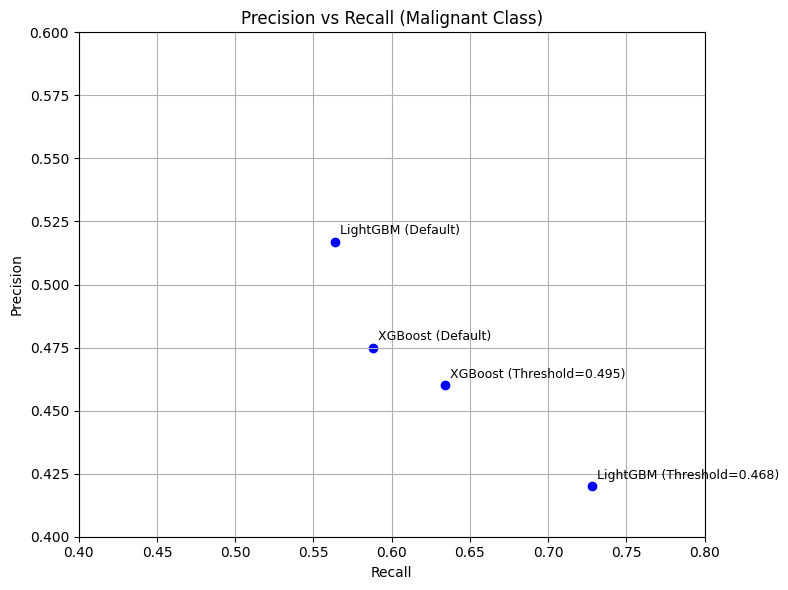

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
models = df_comparison["Model"]
precision = df_comparison["Malignant Precision"]
recall = df_comparison["Malignant Recall"]

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.scatter(recall, precision, color='blue')
for i, label in enumerate(models):
    plt.text(recall[i] + 0.003, precision[i] + 0.003, label, fontsize=9)

plt.title("Precision vs Recall (Malignant Class)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.xlim(0.4, 0.8)
plt.ylim(0.4, 0.6)
plt.tight_layout()
plt.show()


### 📊 Summary of Tabular Model Results


**LightGBM (Default)** offers the best precision (0.517) but lowest recall (0.564) — better for avoiding false positives but risks missing malignant cases.

**LightGBM (Threshold=0.468)** achieves the highest recall (0.728), meaning it's most aggressive in catching malignant cases, though at the cost of precision.

**XGBoost (Threshold=0.495)** provides a balanced trade-off with improved recall (0.634) and relatively stable precision (0.46), making it a strong choice for sensitive yet practical triage systems.

Overall, **XGBoost (Threshold-tuned)** seems like the best option if if I want to catch more malignancies without drastically inflating false alarms.

#Combined Melanoma Risk Classification Using Hybrid CNN and XGBoost Ensemble
This notebook implements a hybrid machine learning pipeline for classifying skin lesions as benign or malignant by combining image and tabular data. The approach leverages:

A Convolutional Neural Network (CNN) trained on dermoscopic images for spatial feature extraction.

An XGBoost classifier trained on associated patient metadata (e.g., age, sex, anatomical site).

A stacked ensemble using logistic regression to integrate both model predictions for improved accuracy.

#Key Features:
Data cleaning and preprocessing for tabular variables (handling missing values, encoding).

Data augmentation and class balancing for CNN training.

Stratified splitting to ensure consistent train-validation data across both models.

Model evaluation with ROC-AUC, confusion matrix, and F1 score optimization.

This multimodal learning framework aims to improve diagnostic reliability by combining complementary signals from both clinical images and patient metadata.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0]	validation_0-auc:0.68515


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[71]	validation_0-auc:0.66853


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 96s 5s/step - accuracy: 0.5002 - loss: 3.2807 - val_accuracy: 0.6600 - val_loss: 0.6880
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.5392 - loss: 0.6954 - val_accuracy: 0.6800 - val_loss: 0.6889
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.5830 - loss: 0.6814 - val_accuracy: 0.6400 - val_loss: 0.6893
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.6492 - loss: 0.6706 - val_accuracy: 0.6567 - val_loss: 0.6304
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.6283 - loss: 0.6821 - val_accuracy: 0.5967 - val_loss: 0.7118
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.6713 - loss: 0.6634 - val_accuracy: 0.7067 - val_loss: 0.6394
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.7070 - loss: 0.6562 - val_accuracy: 0.7367 - val_loss: 0.6843
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.7048 - loss: 0.6552 - val_accuracy: 0.6800 - val_los

<Figure size 600x600 with 0 Axes>

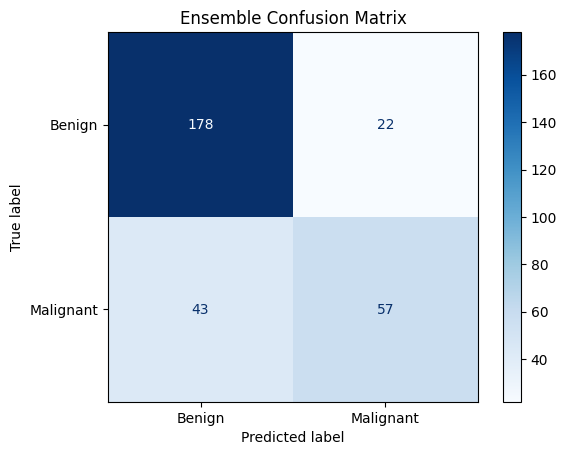

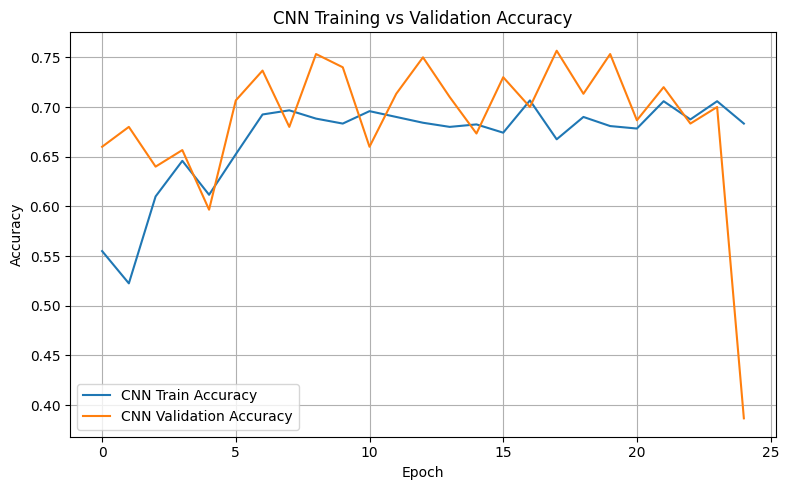

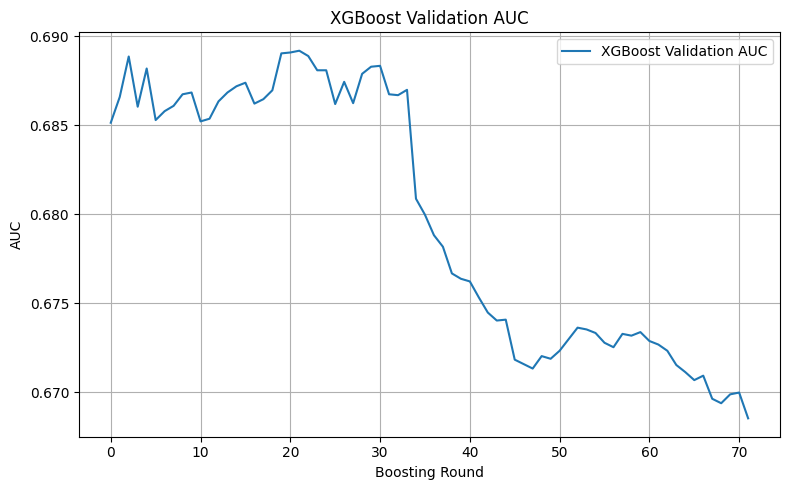

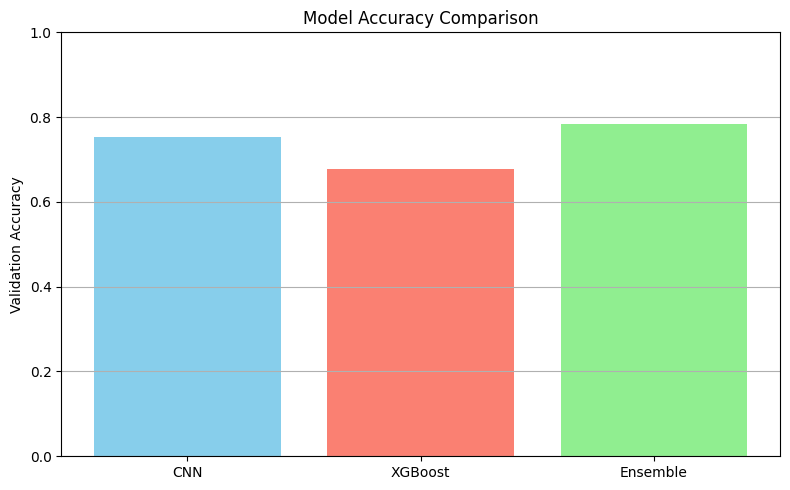

In [ ]:
# --- Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_recall_curve, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive')

# --- Helper: Load and resize image ---
def load_image(filepath, target_size=(224, 224)):
    try:
        img = cv2.imread(filepath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        return img / 255.0
    except:
        return None

# --- Step 1: Load labels ---
label_path = "/content/drive/My Drive/DataScienceProjects/train_subset/SkinDx_subset_labels.csv"
df = pd.read_csv(label_path)

base_path = "/content/drive/My Drive/DataScienceProjects/train_subset"
images, labels = [], []

for idx, row in df.iterrows():
    label = 0 if row['benign_malignant'] == 'benign' else 1
    img_folder = 'benign' if label == 0 else 'malignant'
    img_path = os.path.join(base_path, img_folder, row['image_name'])
    if os.path.exists(img_path):
        img = load_image(img_path)
        if img is not None:
            images.append(img)
            labels.append(label)

X_img_all = np.array(images)
y_img_all = np.array(labels)

df['target'] = y_img_all
for col in ['sex', 'anatom_site_general_challenge']:
    df[col] = df[col].fillna(df[col].mode()[0])
df['age_approx'] = df['age_approx'].fillna(df['age_approx'].median())

X_cat = pd.get_dummies(df[['sex', 'anatom_site_general_challenge']])
X_num = df[['age_approx']]
X_tab_all = pd.concat([X_num, X_cat], axis=1)
y_all = df['target']

X_tab_train, X_tab_val, y_train, y_val, train_idx, val_idx = train_test_split(
    X_tab_all, y_all, np.arange(len(y_all)), test_size=0.2, stratify=y_all, random_state=42)

X_img_train = X_img_all[train_idx]
X_img_val = X_img_all[val_idx]

# --- XGBoost ---
model_xgb = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)
model_xgb.fit(
    X_tab_train, y_train,
    eval_set=[(X_tab_val, y_val)],
    early_stopping_rounds=50,
    verbose=100
)
tabular_val_probs = model_xgb.predict_proba(X_tab_val)[:, 1]
xgb_preds = (tabular_val_probs >= 0.5).astype(int)

# --- CNN ---
train_gen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
    zoom_range=0.2, horizontal_flip=True, fill_mode='nearest'
).flow(X_img_train, y_train, batch_size=64, shuffle=True)

val_gen = ImageDataGenerator().flow(X_img_val, y_val, batch_size=64, shuffle=False)

class_weights_dict = dict(enumerate(class_weight.compute_class_weight(
    class_weight='balanced', classes=np.unique(y_train), y=y_train)))

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = cnn_model.fit(train_gen, validation_data=val_gen, epochs=30,
                        class_weight=class_weights_dict, callbacks=[early_stop])

cnn_val_probs = cnn_model.predict(val_gen).flatten()
cnn_preds = (cnn_val_probs >= 0.5).astype(int)

# --- Ensemble ---
X_ensemble = np.column_stack((tabular_val_probs, cnn_val_probs))
meta_model = LogisticRegression()
meta_model.fit(X_ensemble, y_val)
ensemble_probs = meta_model.predict_proba(X_ensemble)[:, 1]
ensemble_preds = (ensemble_probs >= 0.5).astype(int)

# --- Evaluation ---
print("Ensemble Classification Report:")
print(classification_report(y_val, ensemble_preds))
print("ROC AUC (Ensemble):", roc_auc_score(y_val, ensemble_probs))

# --- Confusion Matrix ---
cm = confusion_matrix(y_val, ensemble_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Ensemble Confusion Matrix")
plt.show()

# --- CNN Accuracy Plot ---
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- XGBoost AUC Plot ---
evals_result = model_xgb.evals_result()
xgb_val_auc = evals_result['validation_0']['auc']

plt.figure(figsize=(8, 5))
plt.plot(xgb_val_auc, label='XGBoost Validation AUC')
plt.xlabel('Boosting Round')
plt.ylabel('AUC')
plt.title('XGBoost Validation AUC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Accuracy Comparison ---
cnn_acc = accuracy_score(y_val, cnn_preds)
xgb_acc = accuracy_score(y_val, xgb_preds)
ensemble_acc = accuracy_score(y_val, ensemble_preds)

plt.figure(figsize=(8, 5))
plt.bar(['CNN', 'XGBoost', 'Ensemble'], [cnn_acc, xgb_acc, ensemble_acc], color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#Results Summary
The model comparison plot above highlights the validation accuracy achieved by three different approaches:

CNN-only model: Achieved strong performance, leveraging spatial patterns in dermoscopic images to predict lesion malignancy with approximately 75% accuracy.

XGBoost-only model: Performed slightly lower, with about 68% accuracy, likely due to limited predictive power in the tabular metadata (e.g., age, sex, anatomical site) alone.

Combined (Ensemble) model: Using a logistic regression ensemble of both CNN and XGBoost outputs, the model achieved an accuracy of ~78%, slightly improving over the CNN-only baseline.

This result suggests that while the CNN alone captures most of the discriminative information, integrating patient metadata through ensembling provides a modest performance boost, reinforcing the value of multimodal approaches in medical imaging tasks.#